# **빅데이터개론 6주차 실습**
## **- 히스토그램, 박스 플롯, 상관계수**

수업 관련 자료 notion :

https://www.notion.so/1e83a70a95474931beb46e23b8289b70

https://github.com/Jin0331/TA

- - -

## **1. 히스토그램(histogram)**

* 데이터의 전체적인 특징을 파악 가능. 양적 데이터의 분포를 나타내는 그래프로서 데이터의 값들이 어떻게 흩어져 있는지에 대한 경향을 살펴볼 수 있다.

* 각 구간들에 포함되는 데이터의 개수(도수, 빈도)를 막대의 길이로 표현한다.

* 막대의 길이는 상대빈도(빈도의 총합에 대한 각 구간의 빈도의 비율, 즉, 빈도/빈도의 총합 계)를 나타내는 경우도 있음

* 연속 데이터의 히스토그램은 각각의 막대들을 간격없이 나열하여 표현한다.

<br>



### **<예시>**

![png](https://www.syncfusion.com/blogs/wp-content/uploads/2019/11/Bar-chart-versus-histogram-chart-elements-representation.png)

https://www.syncfusion.com/blogs/post/histogram-vs-bar-chart.aspx

* ggplot2를 이용한 히스토그램 --> **geom_histogram**


```
ggplot(data = [data], mapping = aes(x = [column]) 
 + geom_hisogram()                                                
```

In [1]:
install.packages(c("tidyverse", "data.table"))
library(tidyverse);library(data.table)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
# data
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% 
 as_tibble()

In [3]:
DF %>% show()

# A tibble: 2,454 x 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# … with 2,444 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [4]:
# 2018년도 선수별 OPS(on base plus slugging)
# OPS = 출루율(OBP) + 장타율(SLG)
# 일반적으로 ops가 .900 이상이면, 좋은 타자, 1.000 이상이면 리그에서 손 꼽히는 타자!

OPS_2018 <- DF %>% filter(year == 2018) %>% select(year, batter_name, OPS) %>% na.omit()
OPS_2018 %>% show()

# A tibble: 226 x 3
    year batter_name   OPS
   <int> <chr>       <dbl>
 1  2018 가르시아    0.902
 2  2018 강경학      0.774
 3  2018 강구성      0.6  
 4  2018 강민국      0.5  
 5  2018 강민호      0.788
 6  2018 강백호      0.88 
 7  2018 강상원      0.143
 8  2018 강승호      0.689
 9  2018 강진성      0.553
10  2018 강한울      0.612
# … with 216 more rows


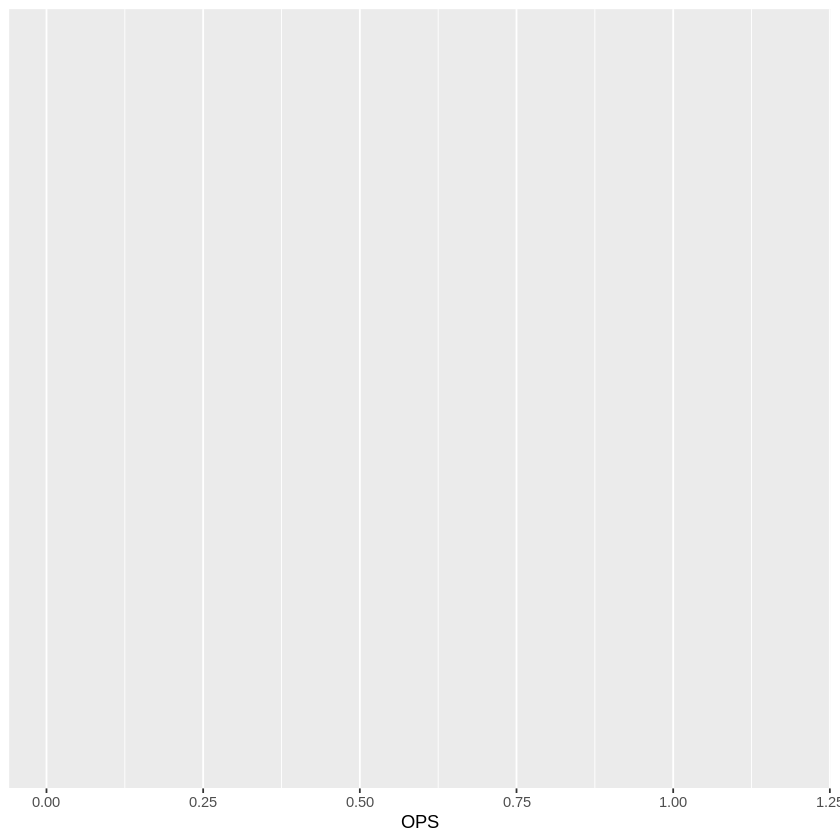

In [5]:
#히스토그램
g_hist <- ggplot(data = OPS_2018, mapping = aes(x = OPS)) # ggplot 객체를 g_hist에 저장
g_hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



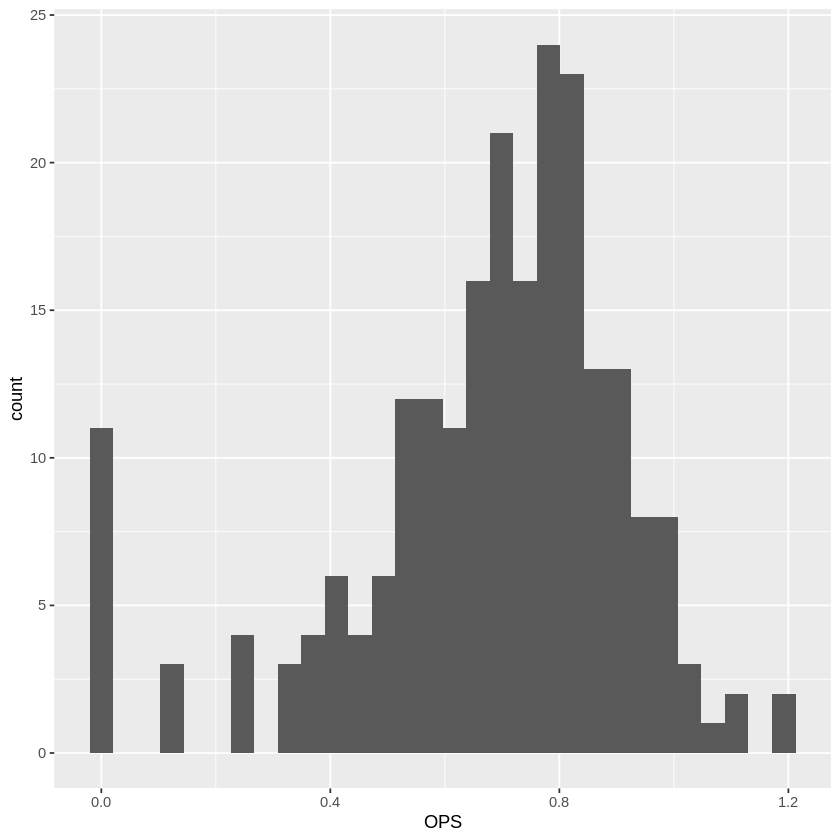

In [6]:
g_hist + geom_histogram()

* geom_histogram() 함수에서 사용되는 주요 인자

 1. binwidth : 막대의 너비 설정. 구간을 나누는 기준이 되므로 막대의 개수가 결정.
 2. bins : 막대의 개수 설정
 3. breaks : 막대의 구간을 숫자 벡터로 할당할 때 사용(bins와 동일한 기능)

Warning message:
“Computation failed in `stat_bin()`:
`binwidth` must be positive”


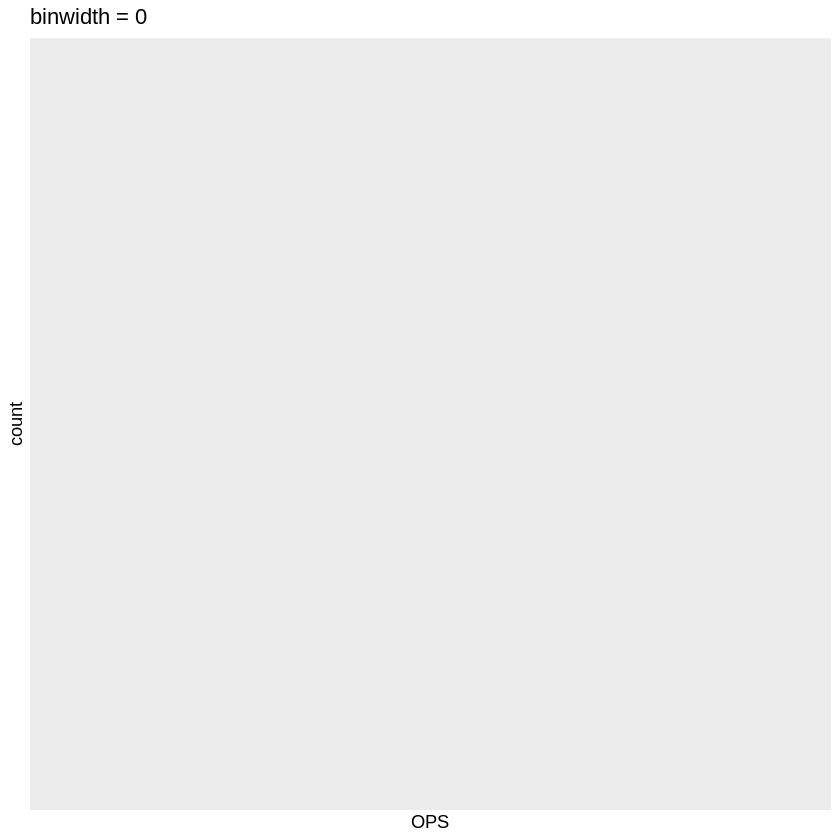

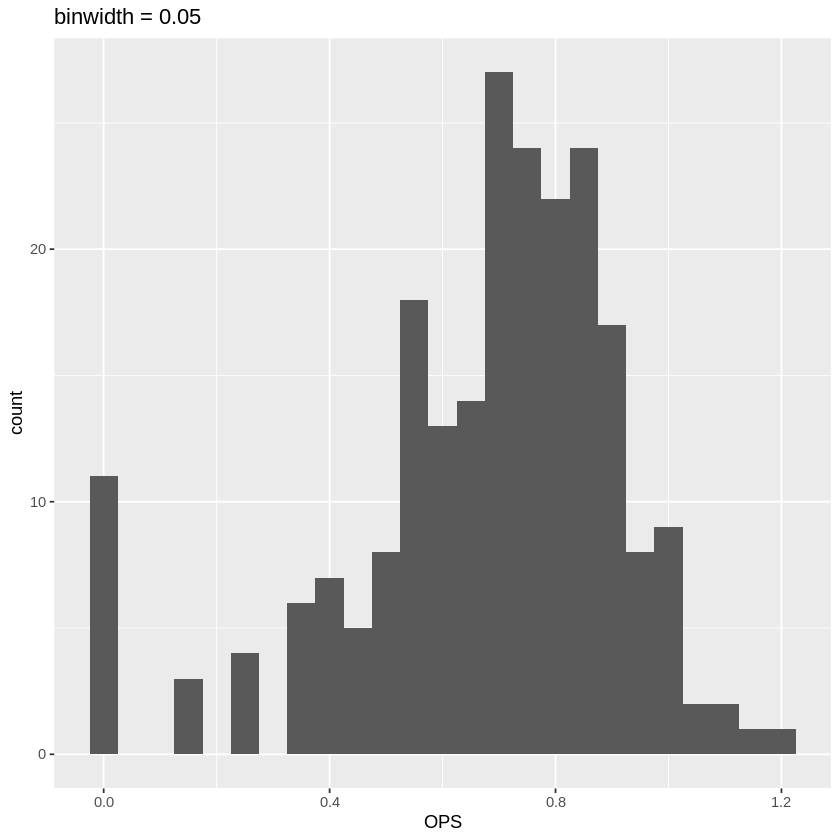

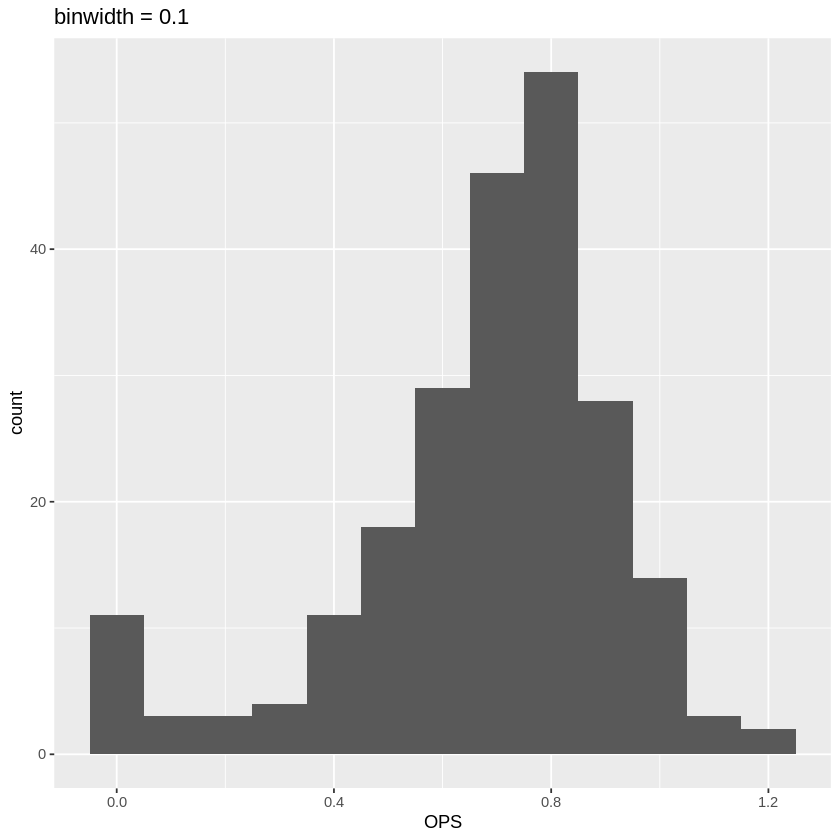

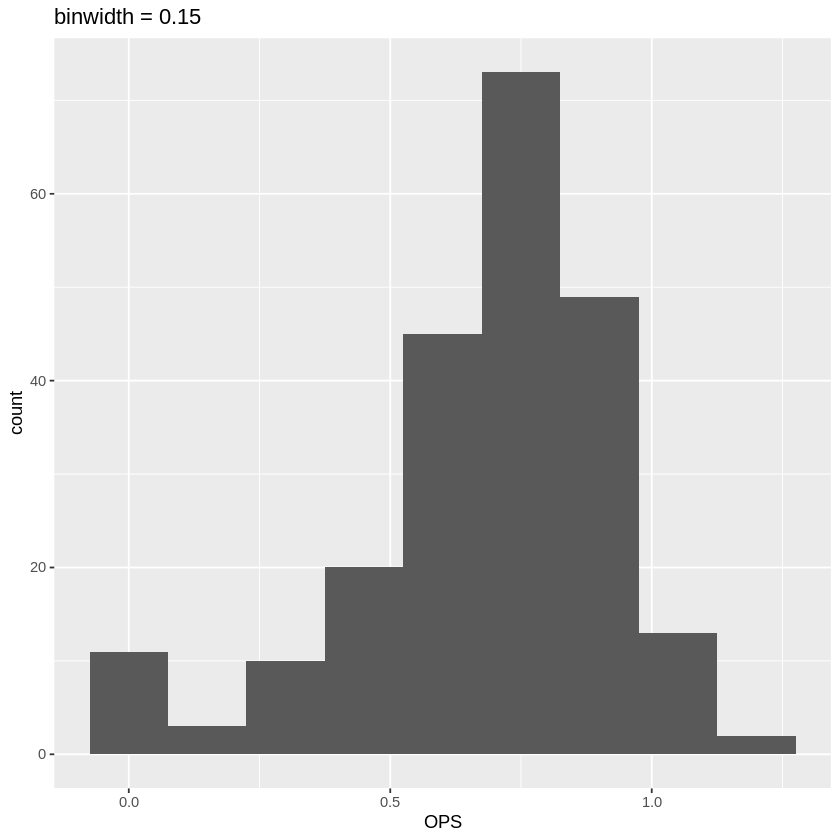

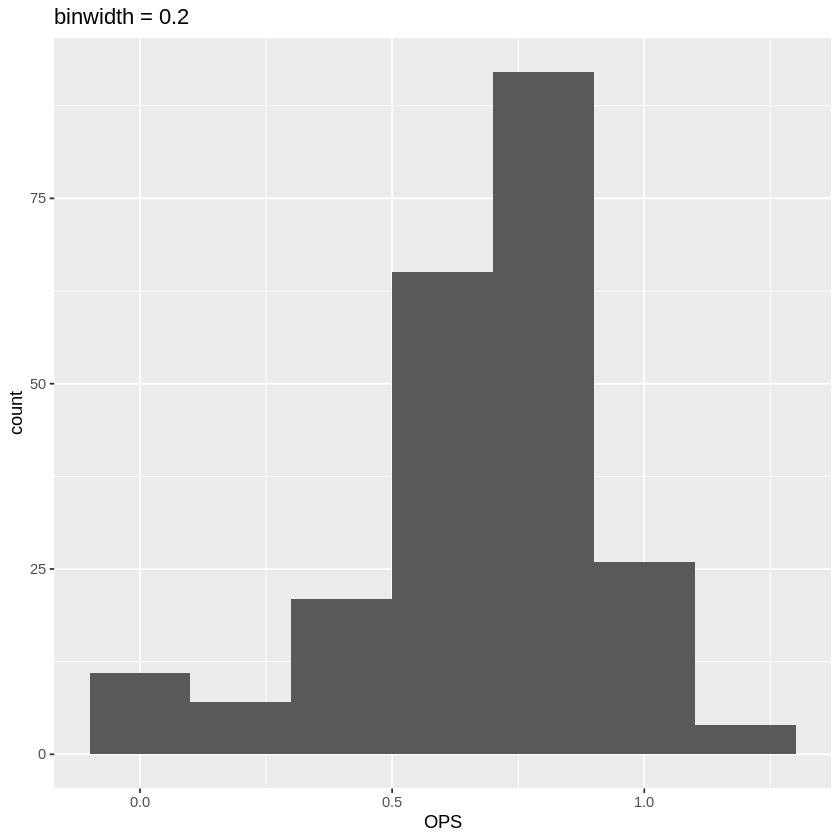

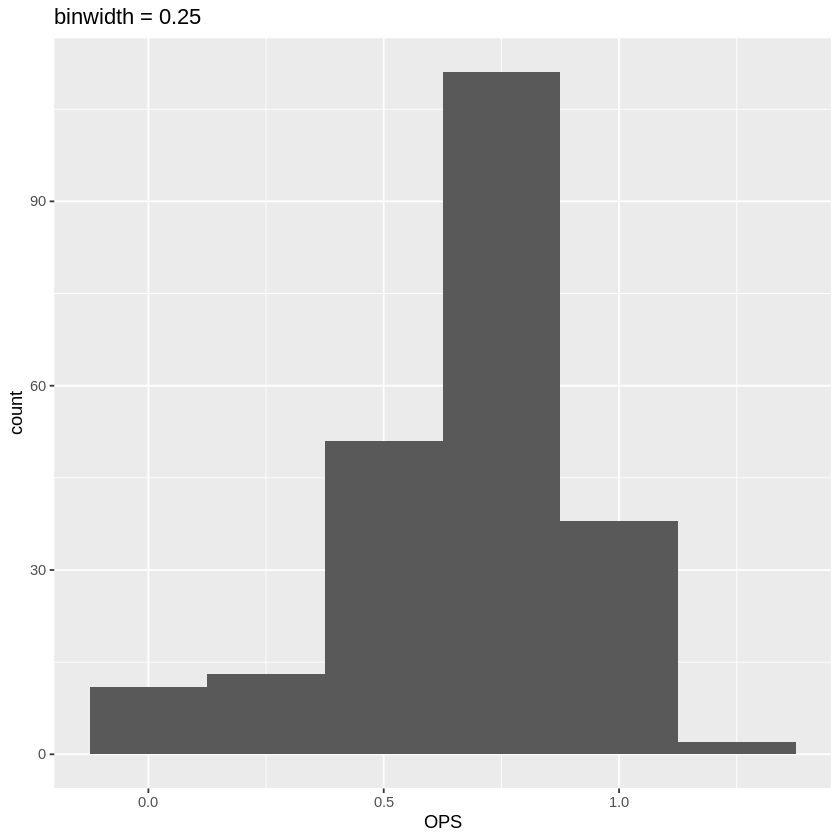

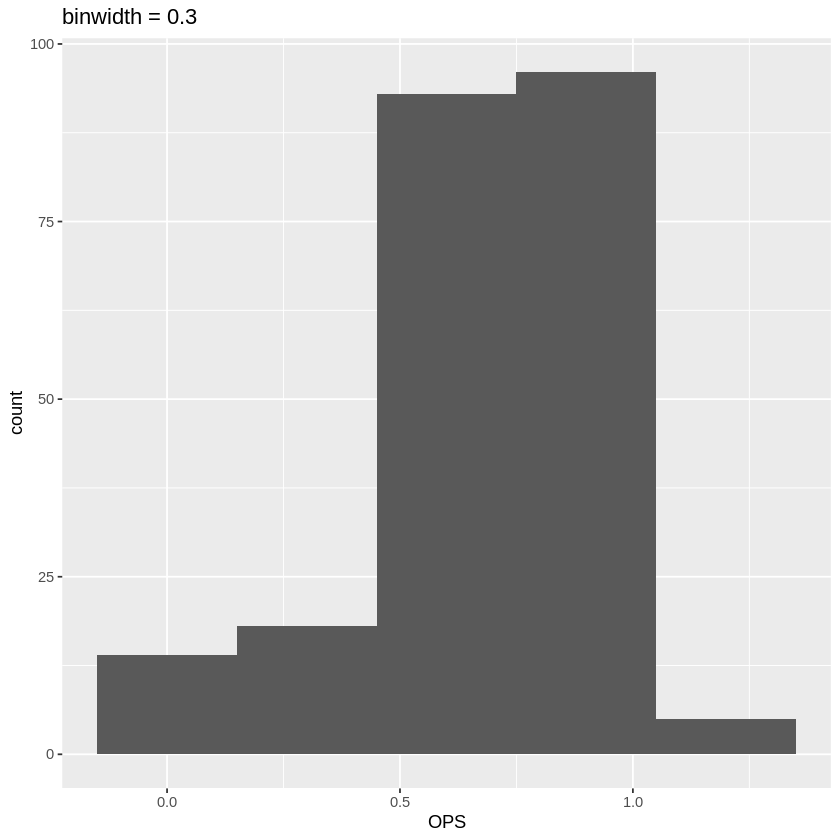

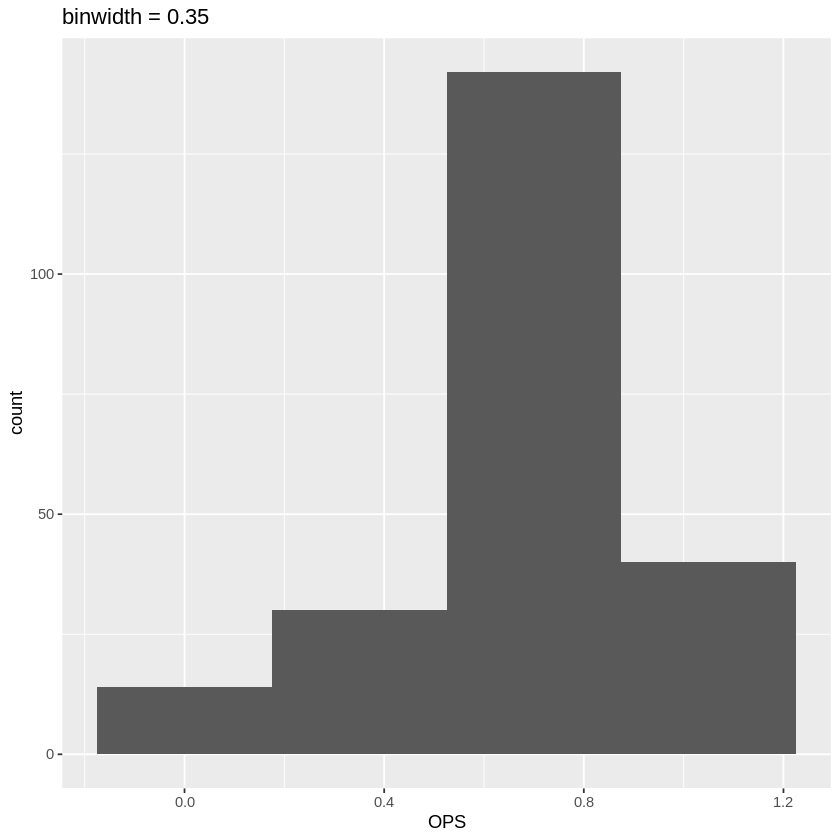

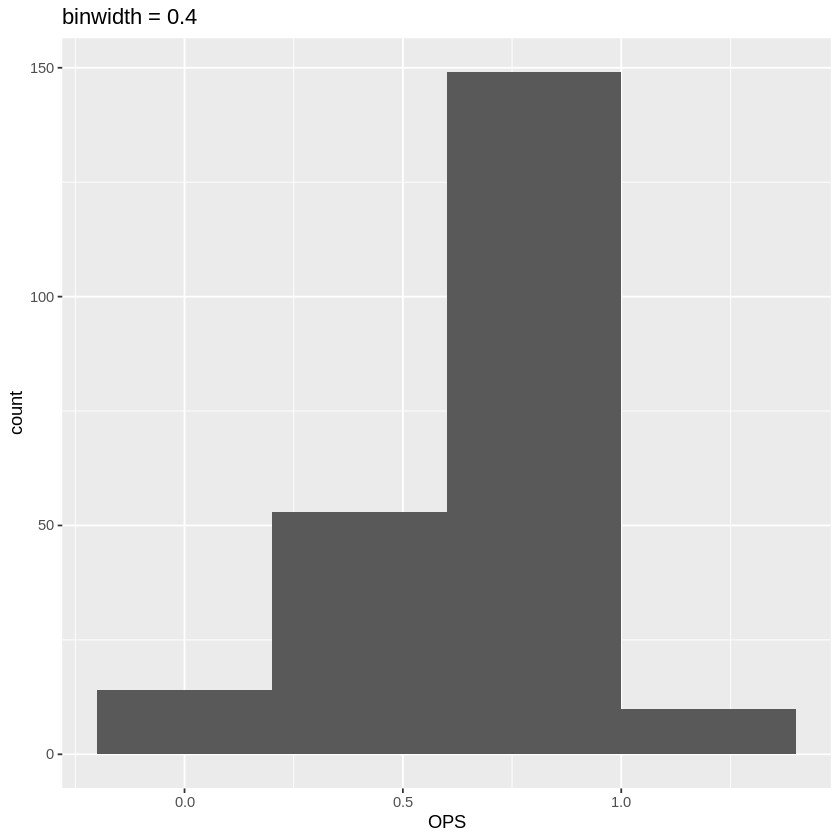

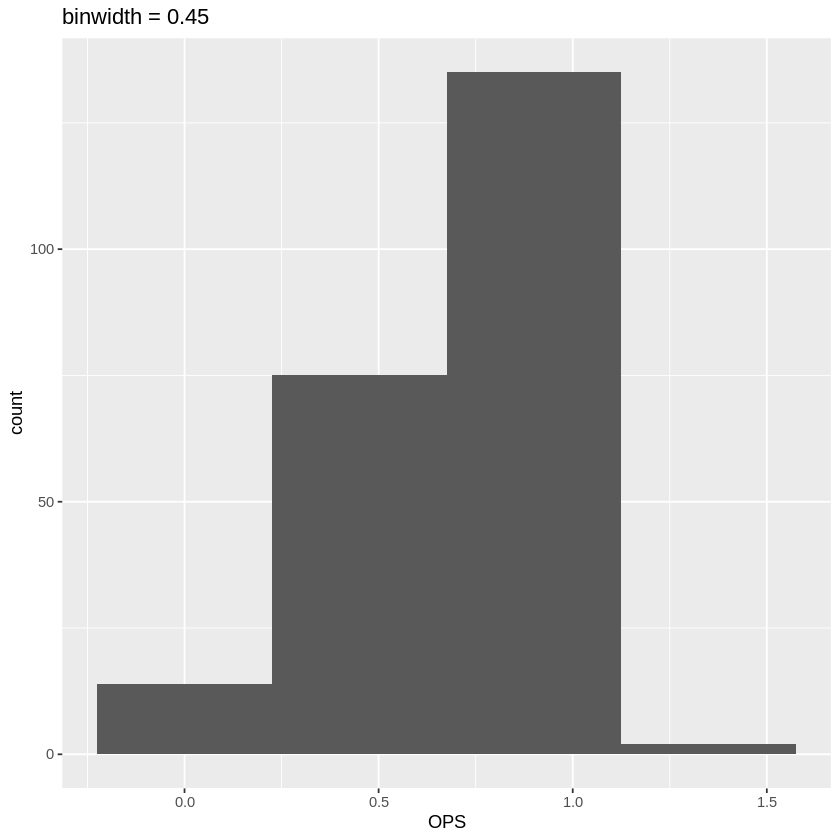

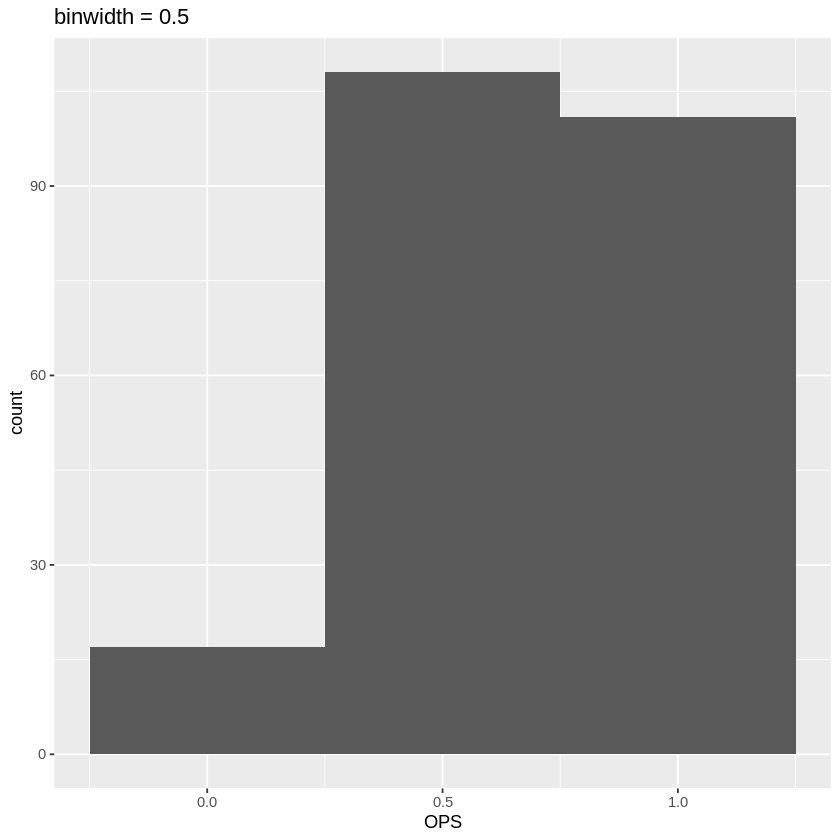

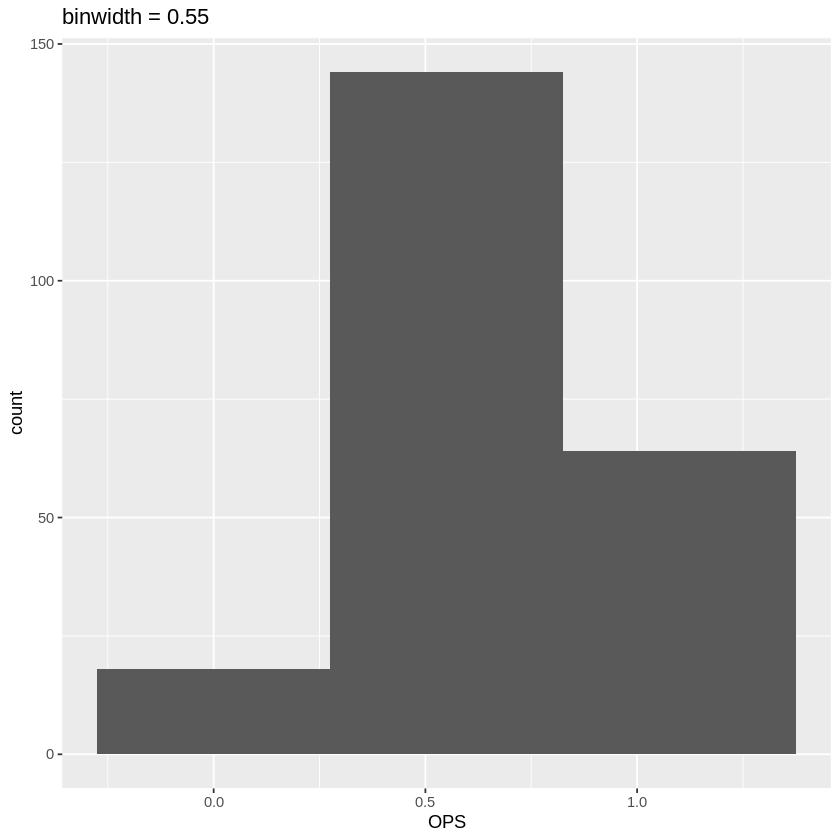

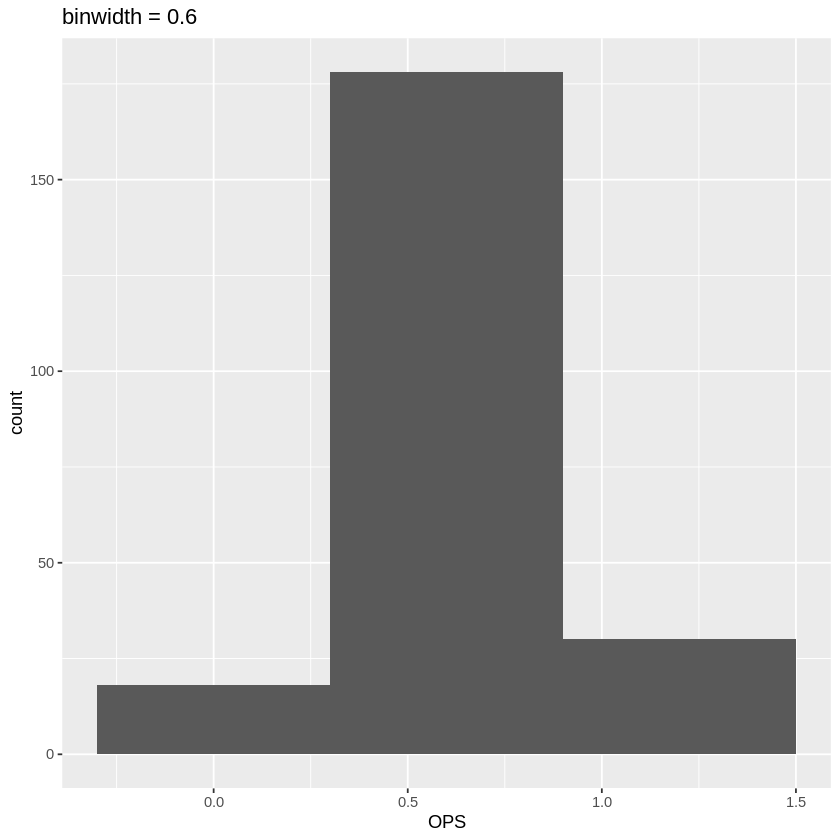

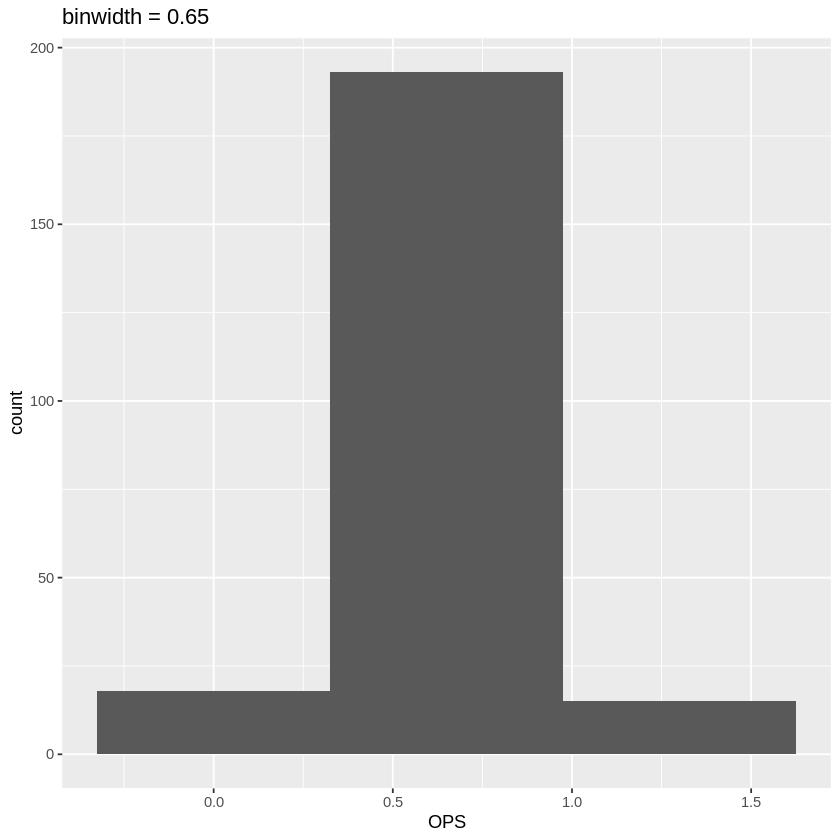

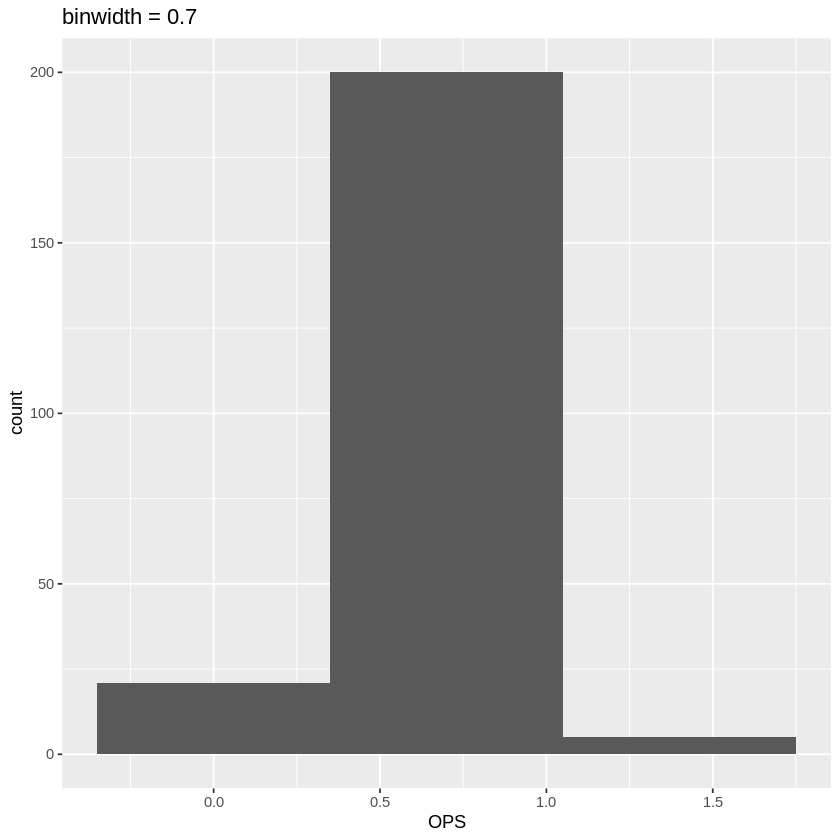

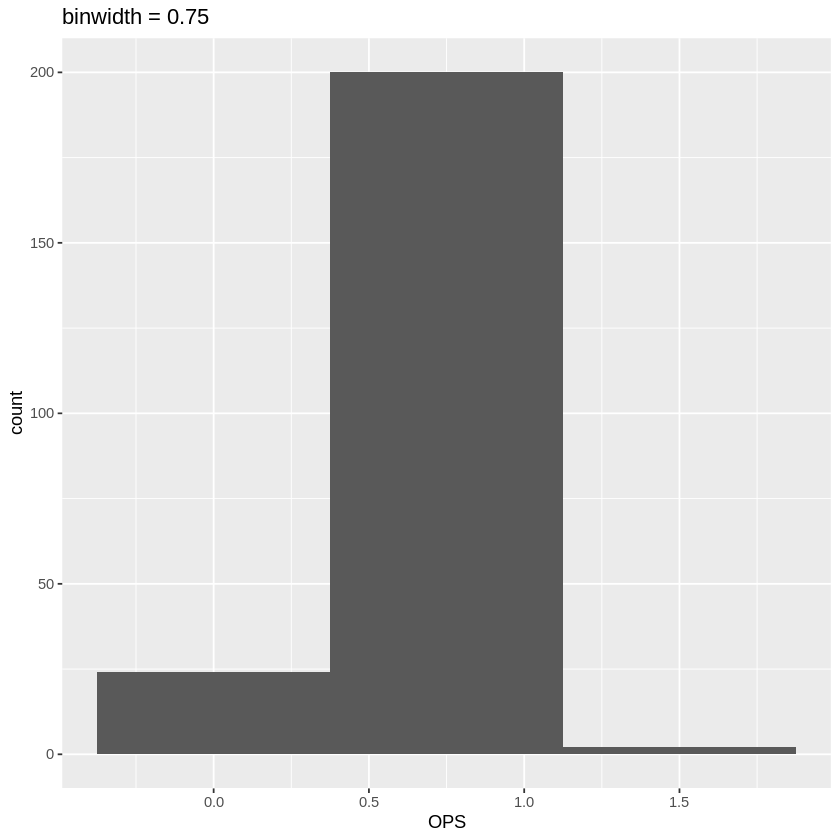

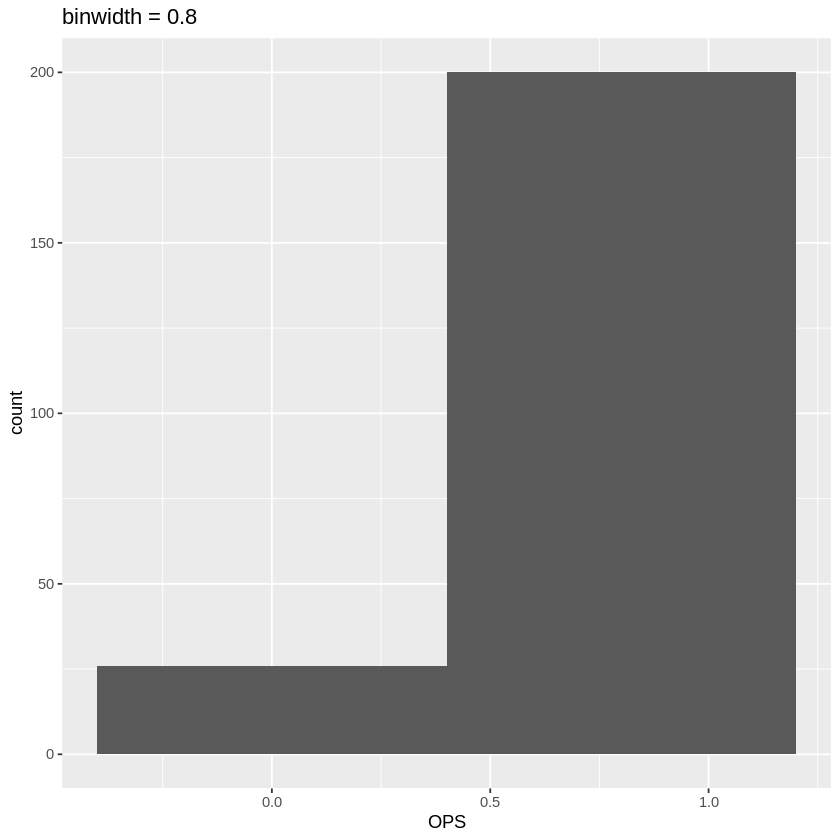

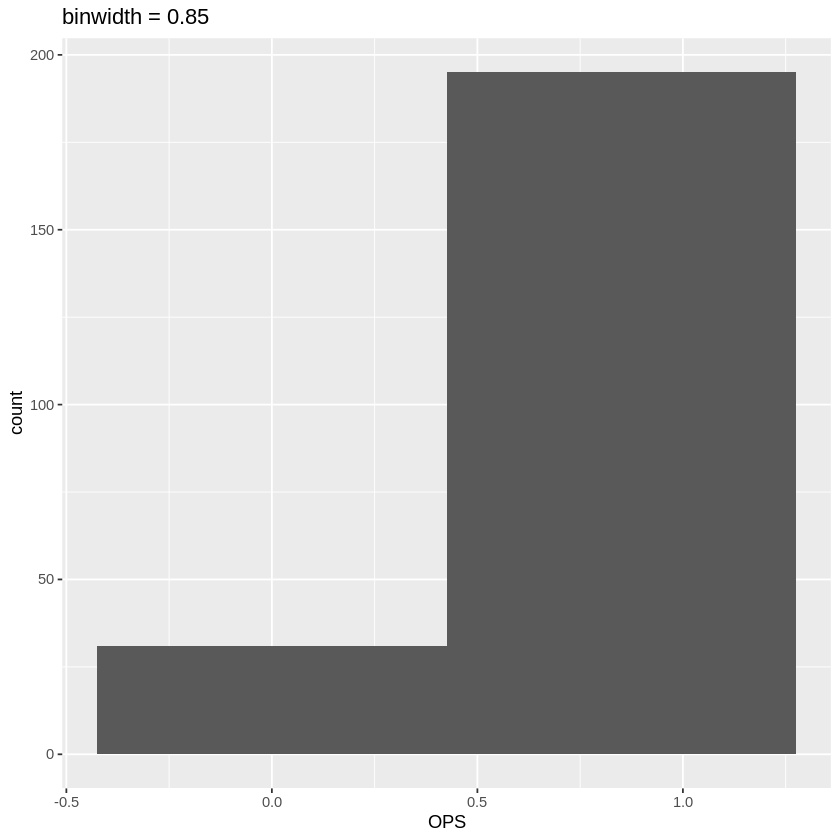

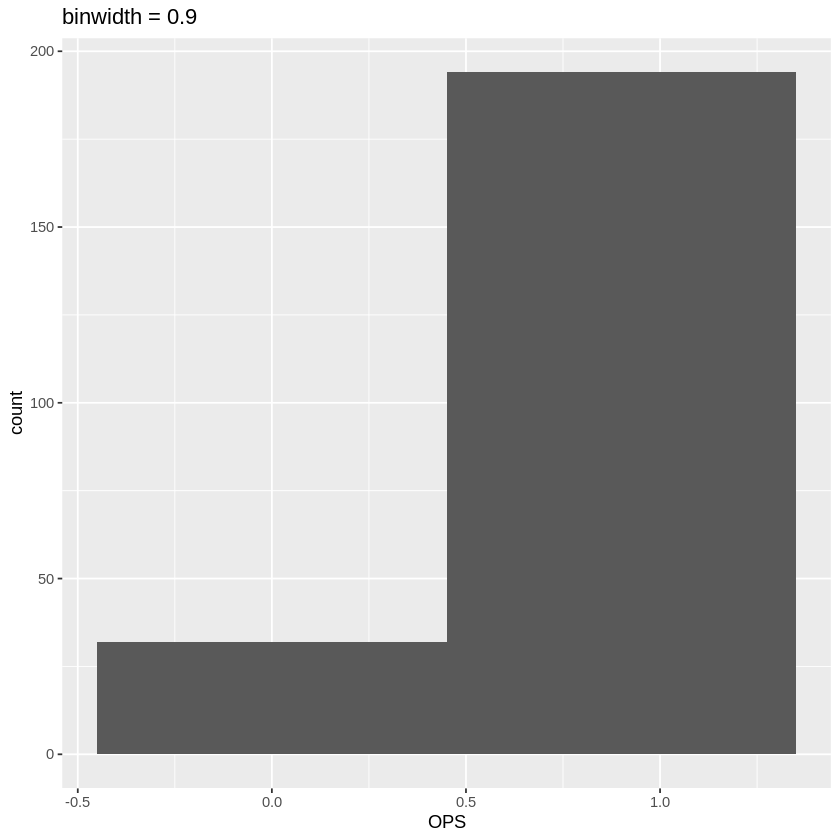

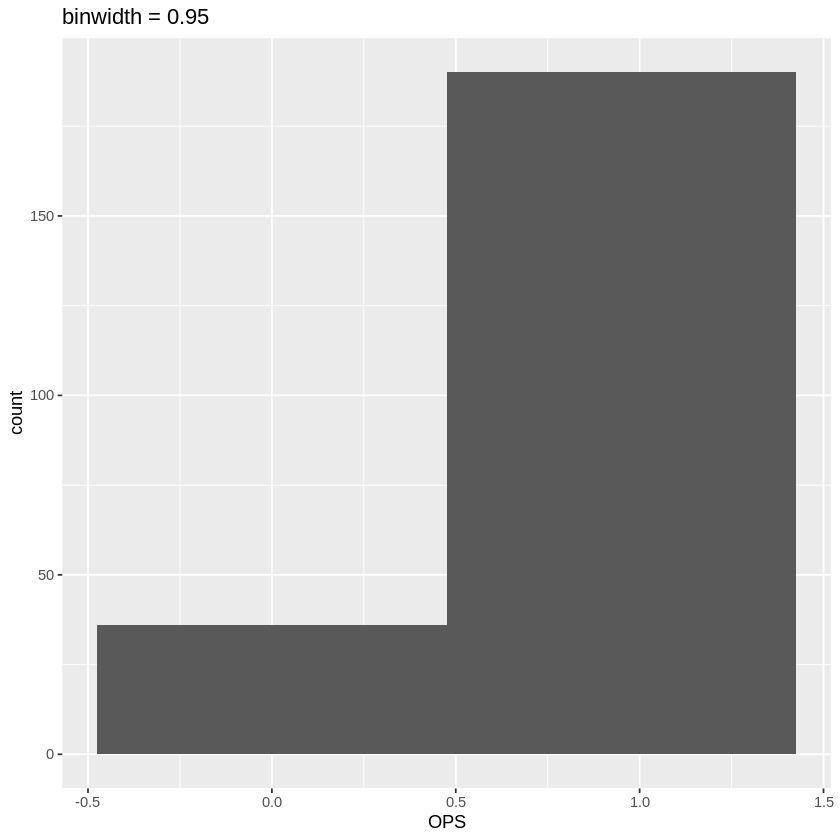

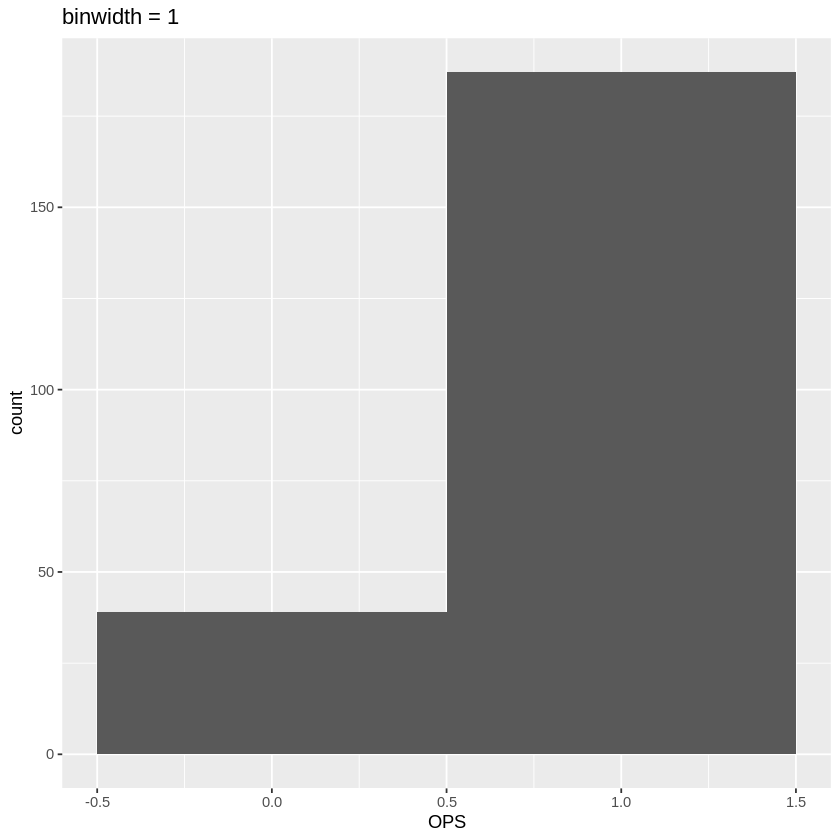

In [7]:
# binwidth 조절(막대의 너비) -> bin보다 우선순위 이다, 
for(binwidth_value in seq(from = 0, to = 1, by = 0.05)){
  temp <- g_hist + geom_histogram(binwidth = binwidth_value) + 
           ggtitle(paste0("binwidth = ", binwidth_value))
  plot(temp)
  Sys.sleep(1.5)
}


Warning message:
“Computation failed in `stat_bin()`:
Need at least one bin.”


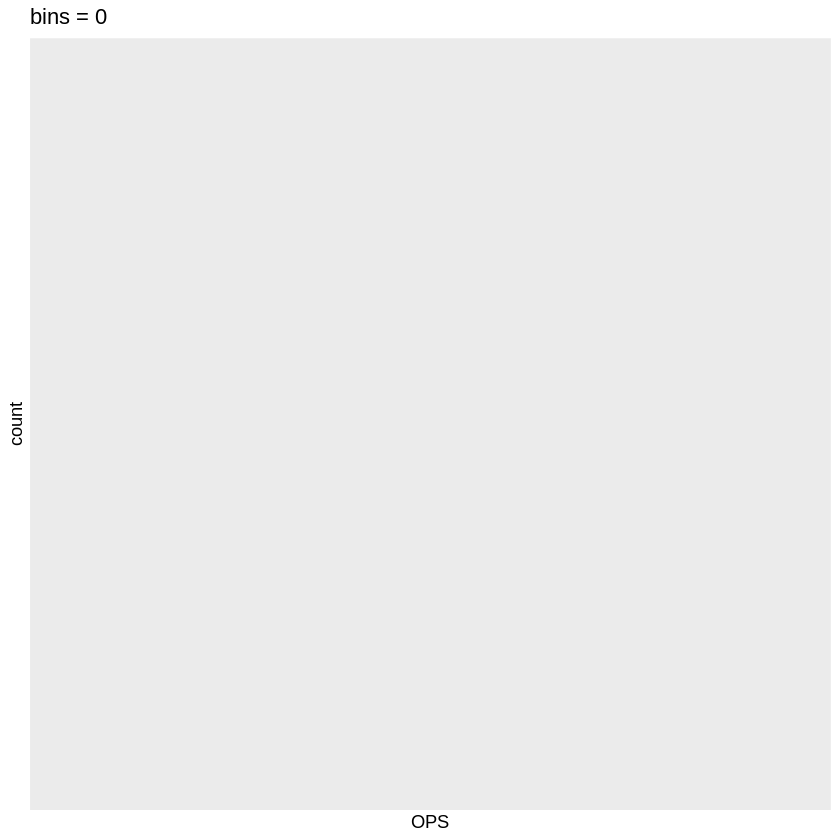

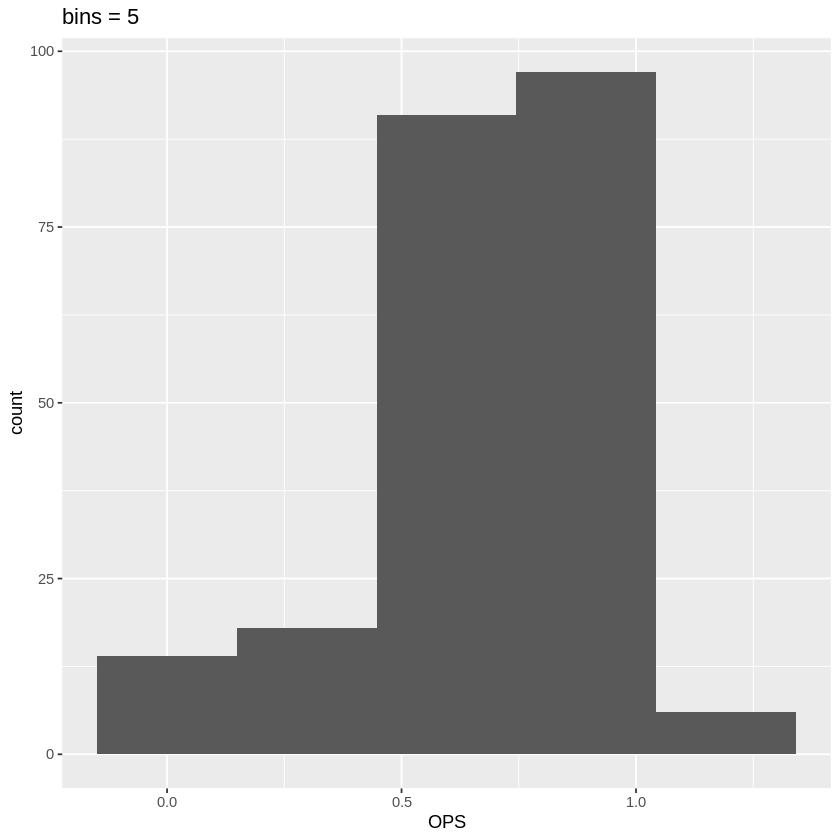

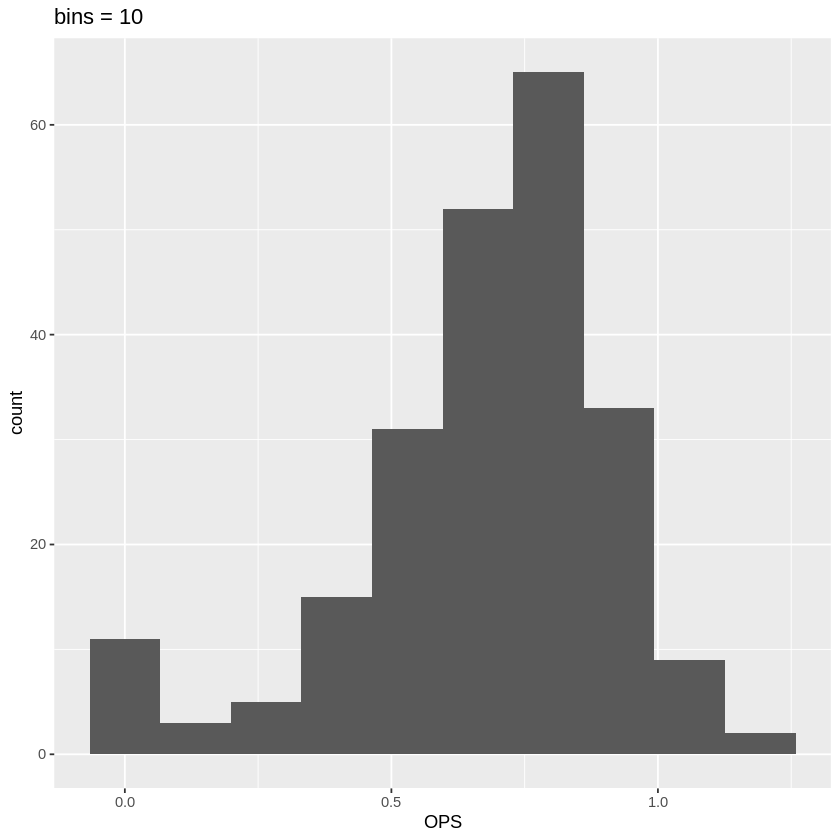

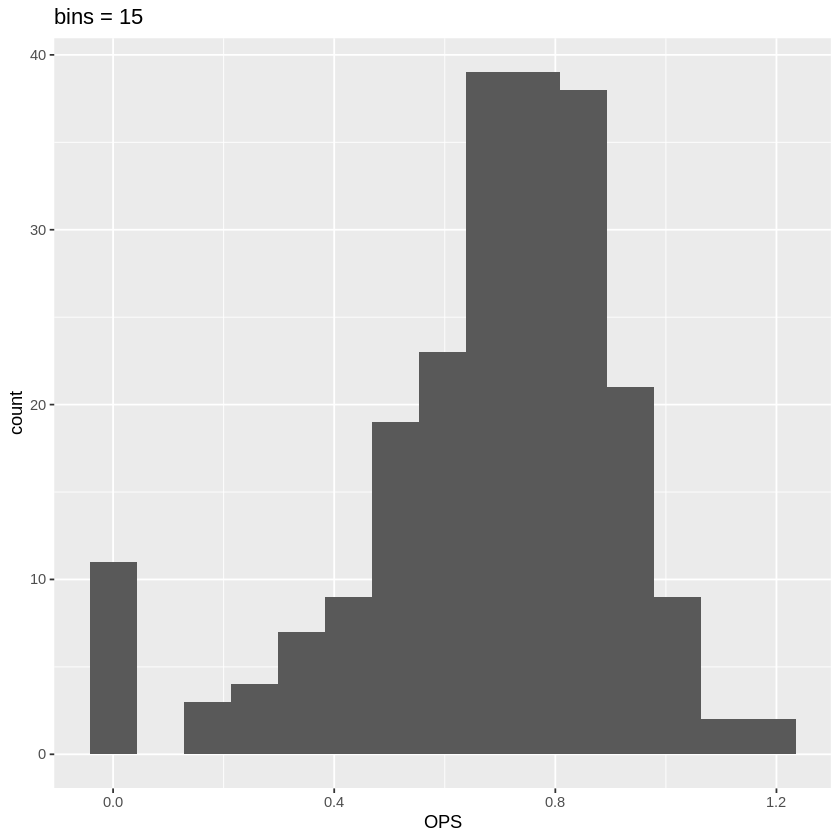

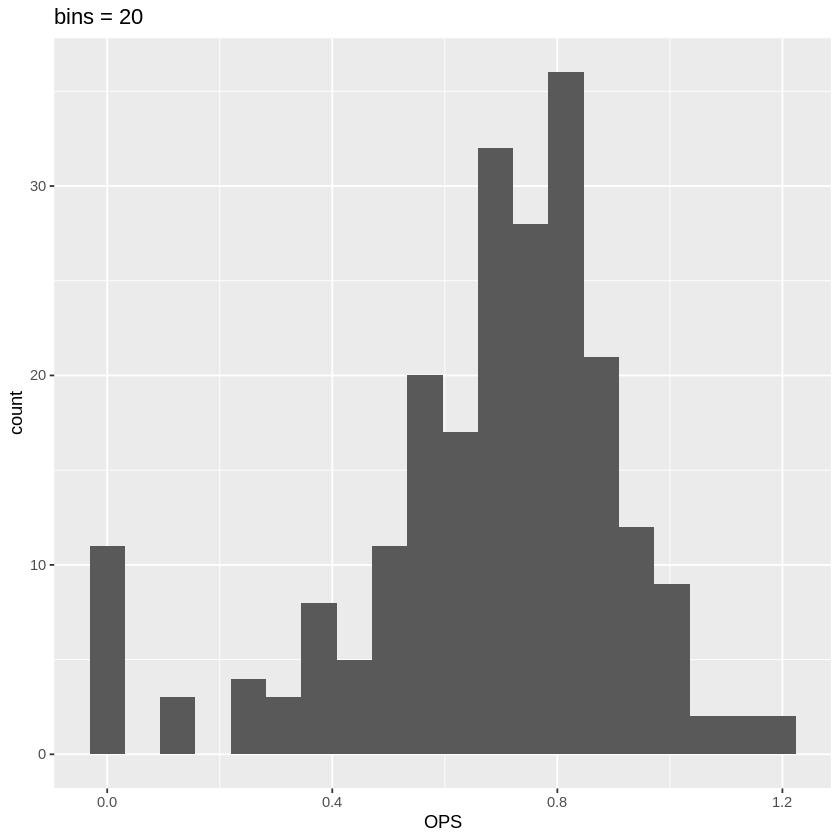

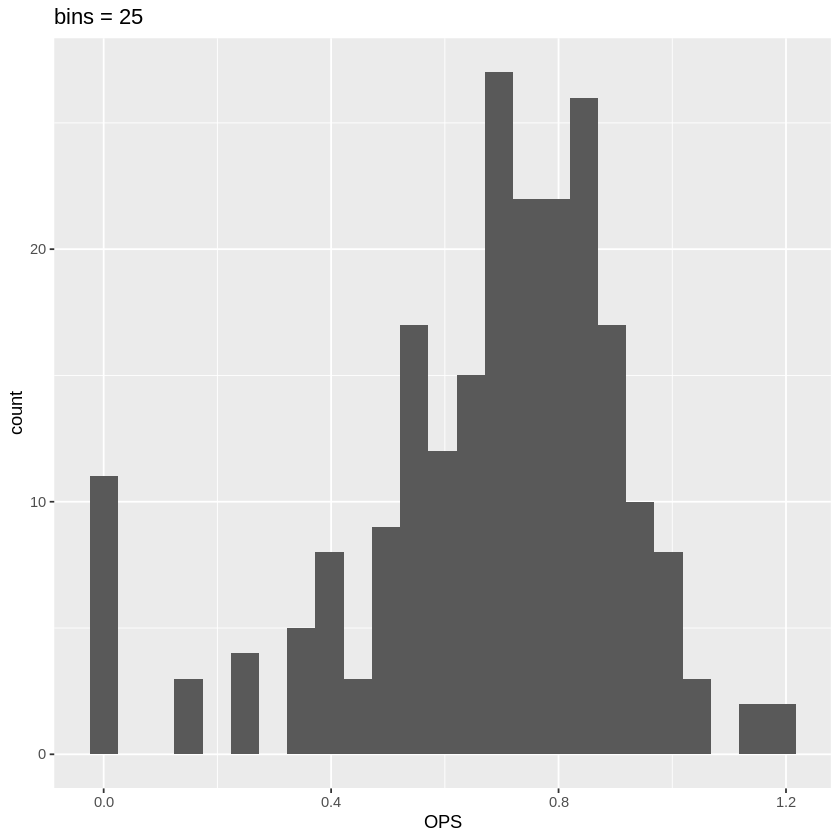

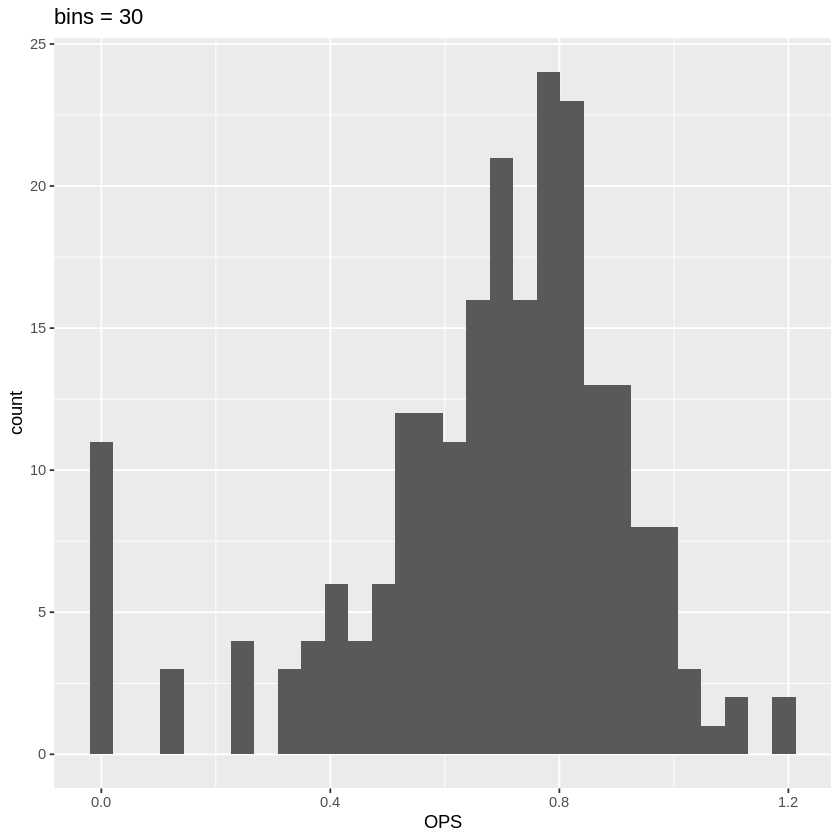

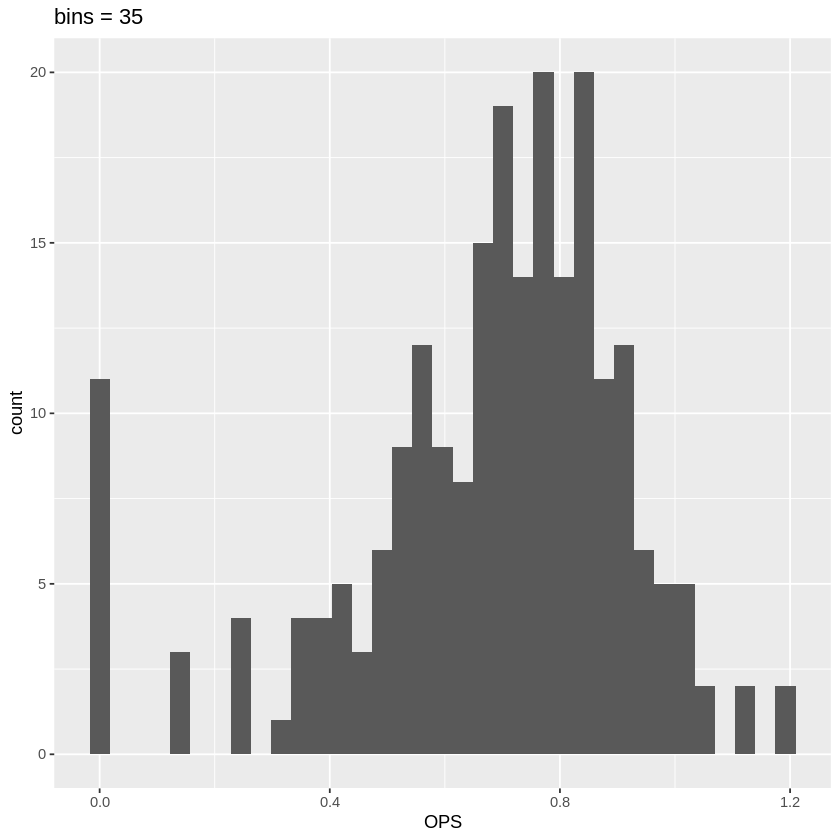

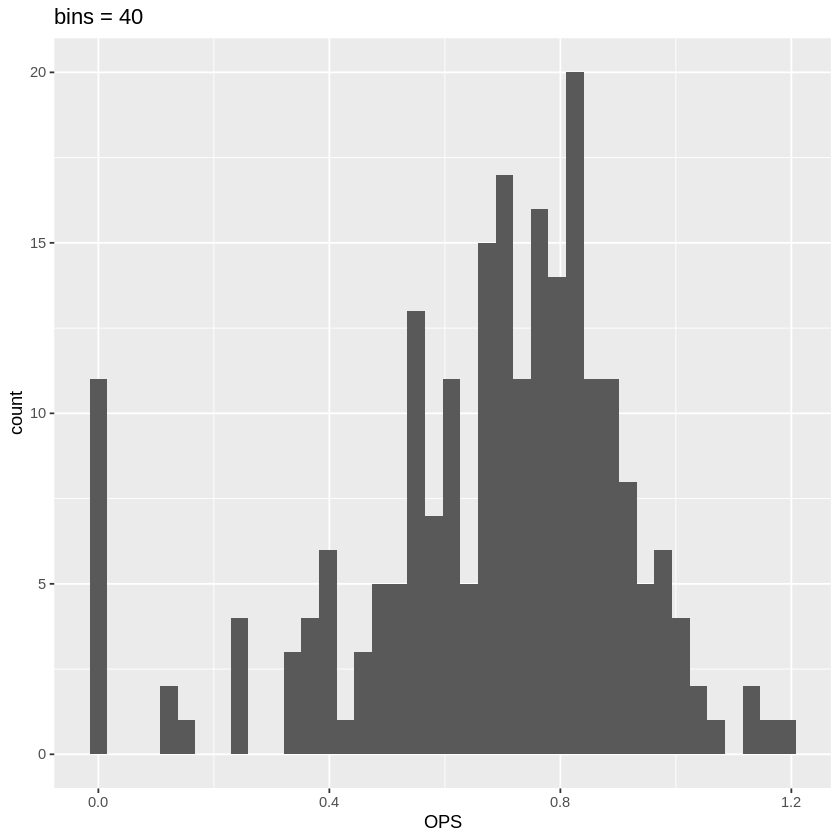

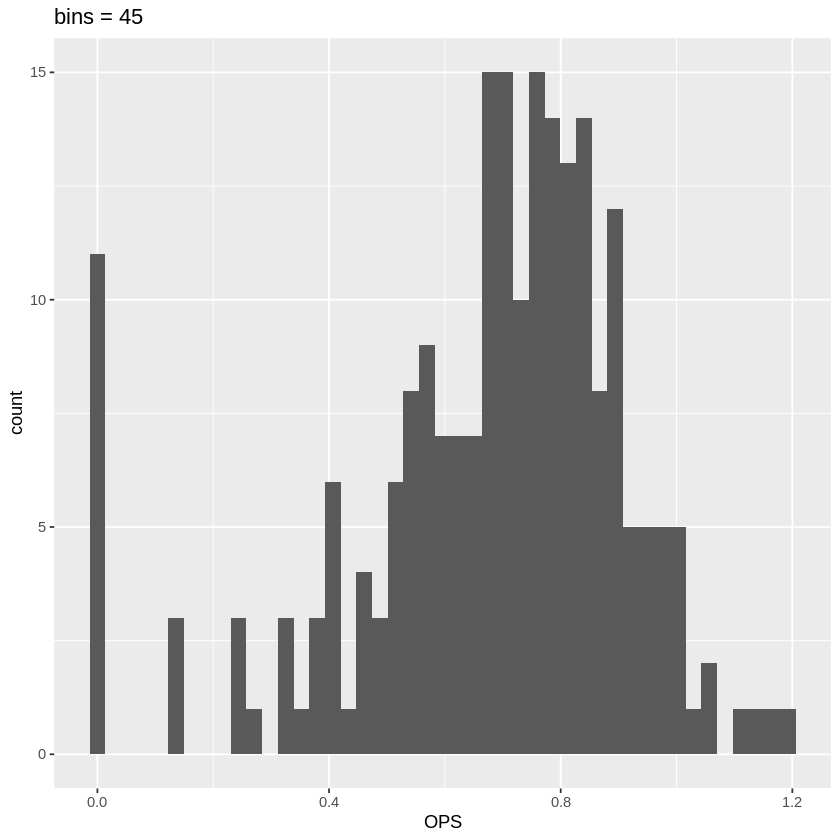

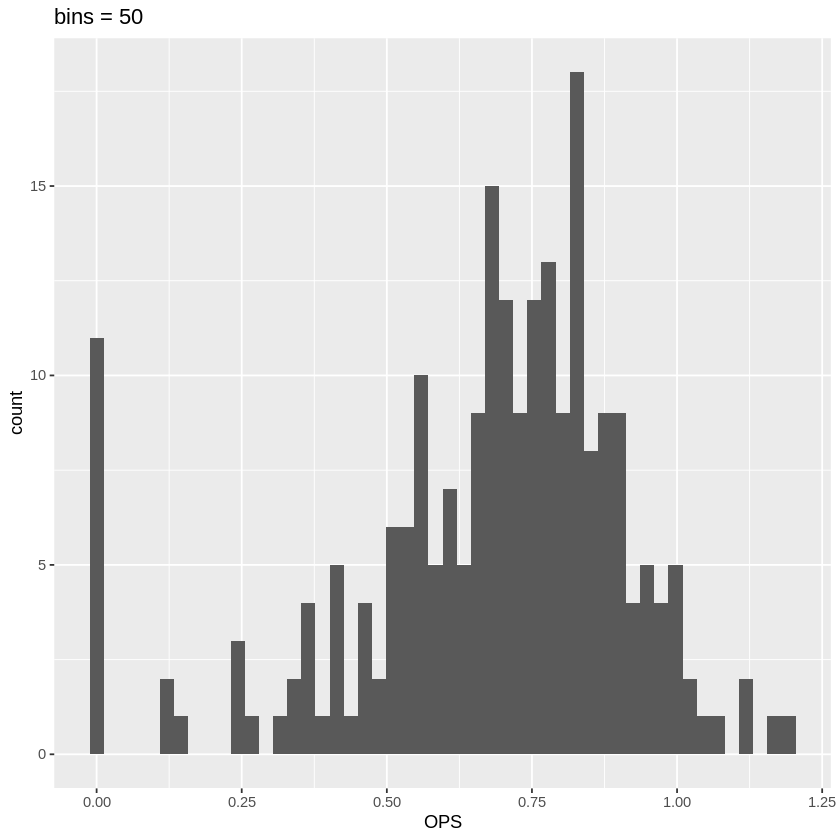

In [8]:
# bins 조절 (막대의 개수)
for(bins_value in seq(from = 0, to = 50, by = 5)){
  temp <- g_hist + geom_histogram(bins = bins_value) + 
           ggtitle(paste0("bins = ", bins_value))
  plot(temp)
  Sys.sleep(1.5)
}

In [15]:
breaks <- seq(from = 0.4, to = 1.15, by = 0.05)
breaks

[1] 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 1.05 1.10
[16] 1.15

 [1] 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80 0.85 0.90 0.95 1.00 1.05 1.10
[16] 1.15


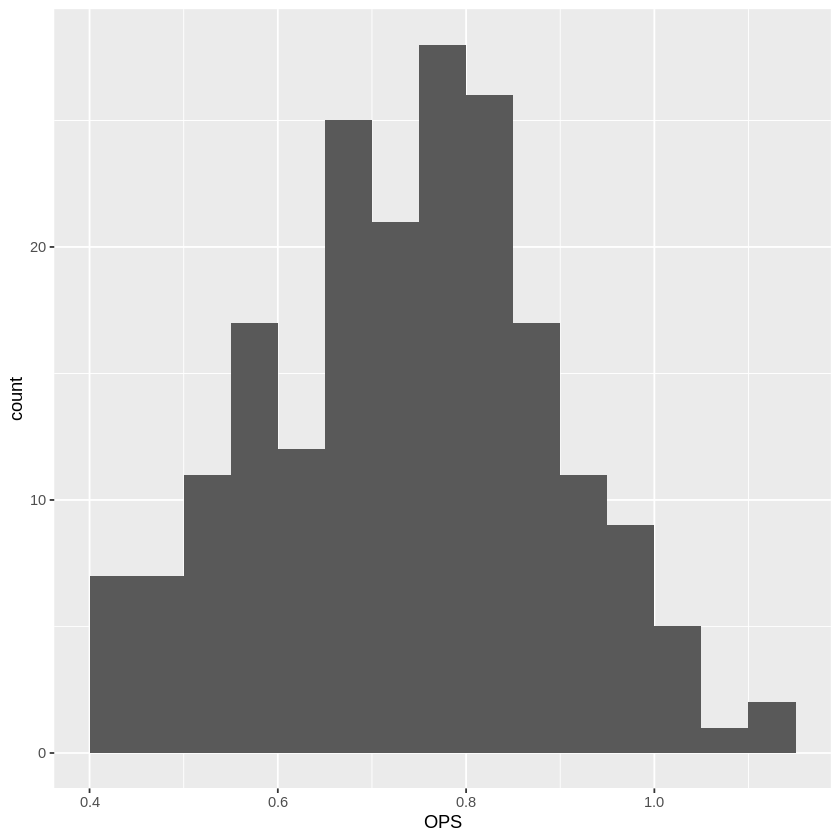

In [17]:
# break 조절  -> 막대 구간을 내가 원하는 숫자로 설정

breaks <- seq(from = 0.4, to = 1.15, by = 0.05)
print(breaks)
g_hist + geom_histogram(breaks = breaks) 

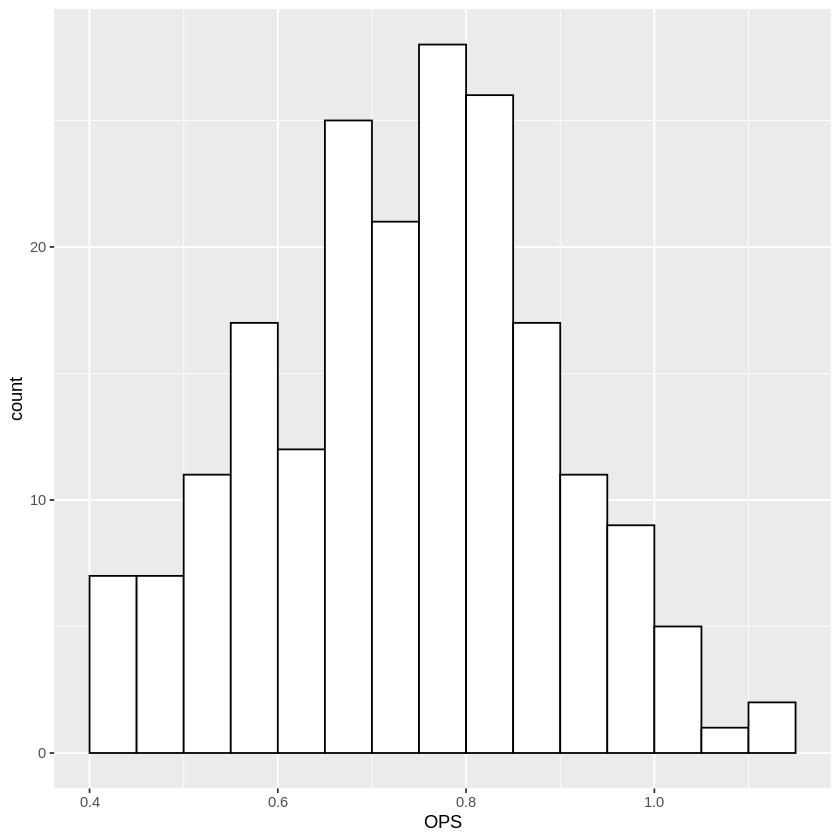

In [11]:
# color와 fill
breaks <- seq(from = 0.4, to = 1.15, by = 0.05)
g_hist + geom_histogram(breaks = breaks, color = "black", fill = "white")

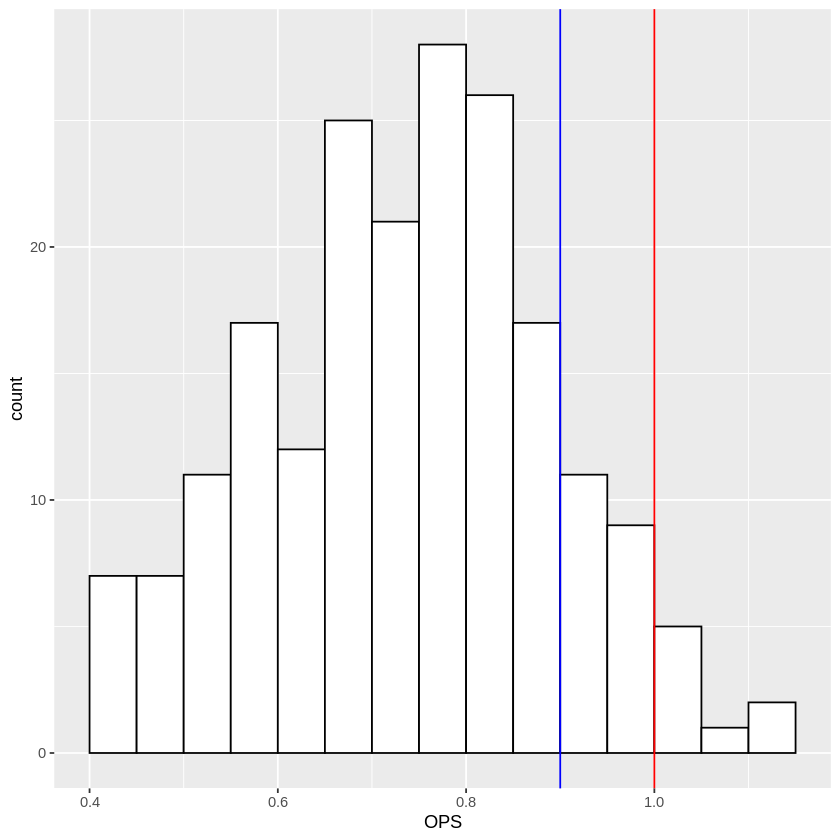

In [18]:
# geom_vline, 수직 선 추가
g_hist + geom_histogram(breaks = breaks, color = "black", fill = "white") +
geom_vline(xintercept = 0.9, color = "blue") +#0.9이상이면 좋은 타자, 1이상이면 거의 1등
 geom_vline(xintercept = 1, color = "red") 

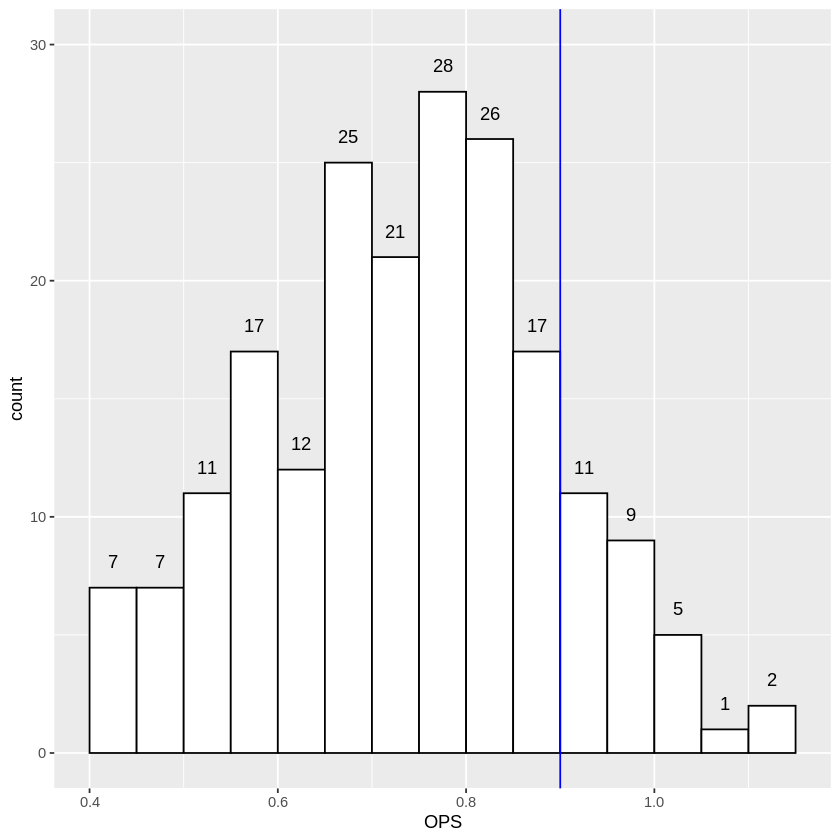

In [13]:
# 막대 라벨링
g_hist + geom_histogram(breaks = breaks, color = "black", fill = "white") +
 geom_vline(xintercept = 0.9, color = "blue") +
 stat_bin(breaks = breaks, geom = "text", aes(label = ..count..), vjust = -1.5)  +
 scale_y_continuous(limits = c(0, 30))

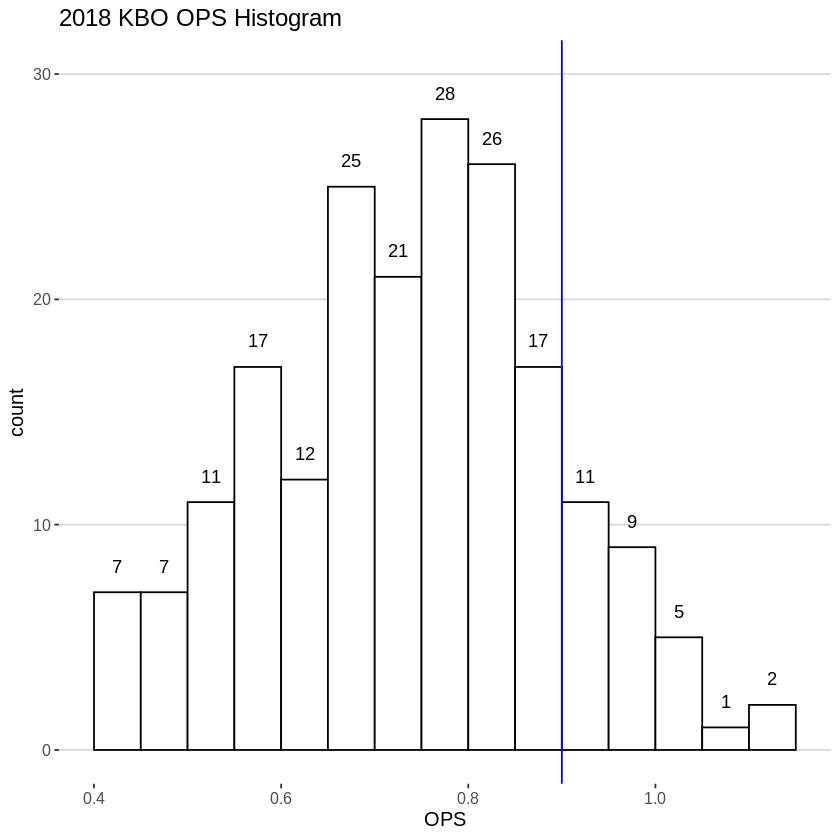

In [65]:
# ggthemes
# install.packages("ggthemes")
library(ggthemes)

g_hist + geom_histogram(breaks = breaks, color = "black", fill = "white") +
 geom_vline(xintercept = 0.9, color = "blue") +
 stat_bin(breaks = breaks, geom = "text", aes(label = ..count..), vjust = -1.5)  +
 scale_y_continuous(limits = c(0, 30)) + 
 theme_hc() +##그래프의 테마를 바꿀 수 있다.
 ggtitle("2018 KBO OPS Histogram")

## **2. 박스 플롯(boxplot)**

* 자료로부터 얻어낸 여러가지 요약수치들를 한 눈에 표현

* bloxplot 지표
  1. 최솟값 (minumum)
  2. 최댓값 (Maximum)
  3. 중앙값 (Median)
  4. 1사분범위 (1Q, 즉 하위 25% 지점)
  5. 3사분범위 (3Q, 즉 상위 25% 지점)
  6. IQR (inter-quartile range) : IQR은 1Q~3Q 구간
  7. 이상치 (Outlier) : 1Q, 3Q, IQR을 통해 하위 이상치(= 1Q - 1.5 * IQR)와 상위 이상치(= 3Q + 1.5 * IQR)

<br>



### **<예시>**

![png](https://media.vlpt.us/images/suzin/post/2668cebc-ab74-4964-bfcc-3d68fbe63adb/20200211_112113.png)

* ggplot2를 이용한 박스플롯 --> **geom_boxplot**


```
ggplot(data = [data], mapping = aes(x = [column], y = [colum]) 
 + geom_boxplot()   
```

In [23]:
install.packages(c("tidyverse", "data.table"))
library(tidyverse);library(data.table)

DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% 
 as_tibble()

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [67]:
# 이 부분 설정은 lab 5 참고할 것
# 한글을 인식하게 하기 위해서 필요하다. 

install.packages("extrafont")
library(extrafont)
system("sudo apt-get install fonts-nanum-coding")
font_import(pattern = "Nanum") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
 : NanumGothicCoding-Bold already registered in fonts database. Skipping.

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
 : NanumGothicCoding already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /usr/local/lib/R/site-library/extrafontdb/metrics

Warning message in grepl("^FamilyName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FontName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FullName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^Weight", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FamilyName", text):
“input string 4 is invalid in this locale”
Warning message in grepl("^FontName", text):
“input string 4 is invalid in this locale”
Warning message in grep

In [68]:
library(extrafont)
fonts()

[1] "NanumGothicCoding"

# A tibble: 216 x 5
    year team  batter_name    HR   OPS
   <int> <chr> <chr>       <int> <dbl>
 1  2017 한화  강경학          0 0.552
 2  2017 NC    강구성          0 0    
 3  2017 롯데  강민호         22 0.843
 4  2017 한화  강상원          0 0.5  
 5  2017 LG    강승호          5 0.655
 6  2017 NC    강진성          1 0.925
 7  2017 삼성  강한울          0 0.684
 8  2017 한화  이종환          0 0    
 9  2017 넥센  고종욱          8 0.811
10  2017 삼성  구자욱         21 0.91 
# … with 206 more rows


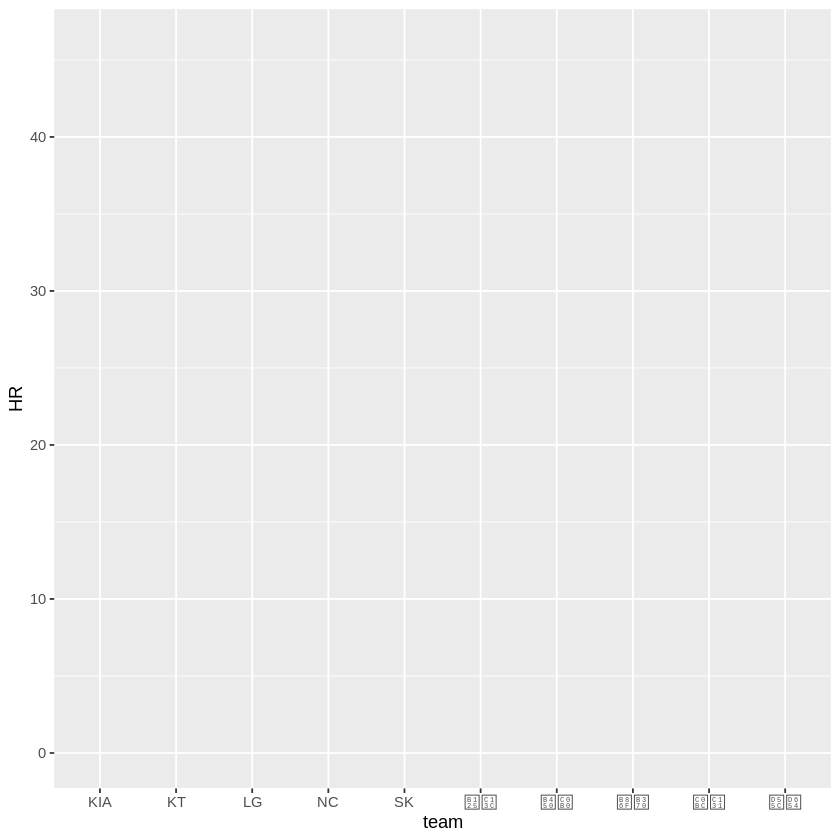

In [70]:
# 2017 팀별 홈런
HR_2017 <- DF %>% filter(year == 2017) %>% select(year, team, batter_name, HR, OPS) %>% na.omit()
HR_2017 %>% show()


g_box <- ggplot(data = HR_2017, mapping = aes(x = team, y = HR)) 
g_box

* geom_boxplot()에서 outlier 관련 인자들
  * outlier.color : 아웃라이어의 테두리 색을 지정합니다.
  * outlier.fill : 아웃라이어의 채우기 색을 지정합니다.
  * outlier.shape : 아웃라이어의 형태를 지정합니다.
  * outlier.size : 아웃라이어의 크기를 지정합니다.
  * outlier.stroke : 아웃라이어의 테두리 두께를 지정합니다.
  * outlier.alpha : 아웃라이어의 투명도를 지정합니다.

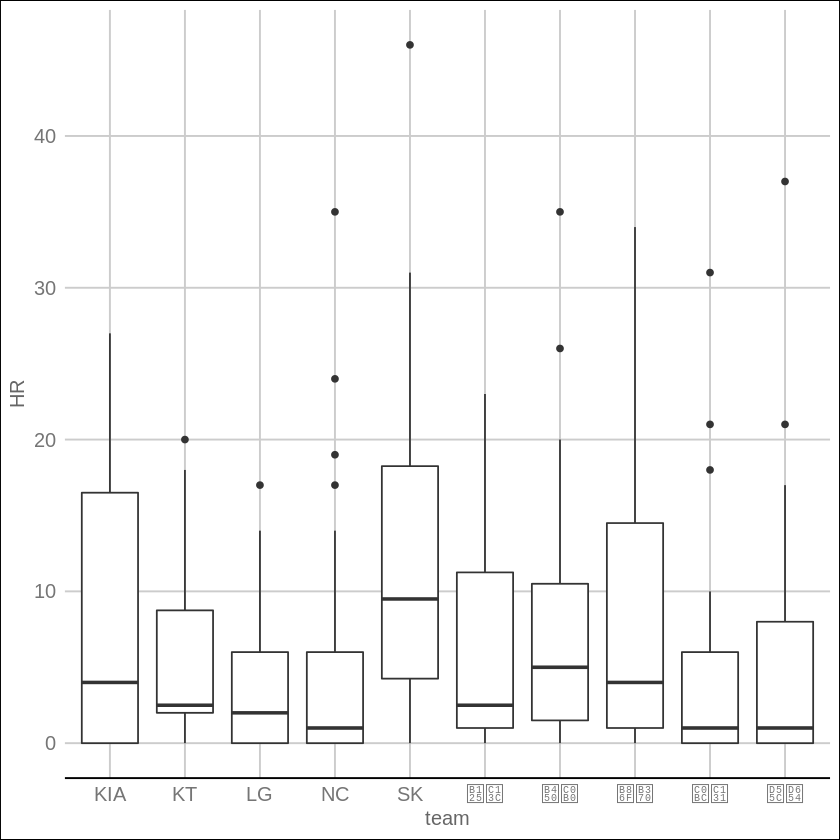

In [71]:
#install.packages("ggthemes")
library(ggthemes)

g_box + geom_boxplot() +
 theme(axis.title.x = element_text(family = fonts()[1])) +  # 한글 설정. 
 theme_gdocs() # ggthemes

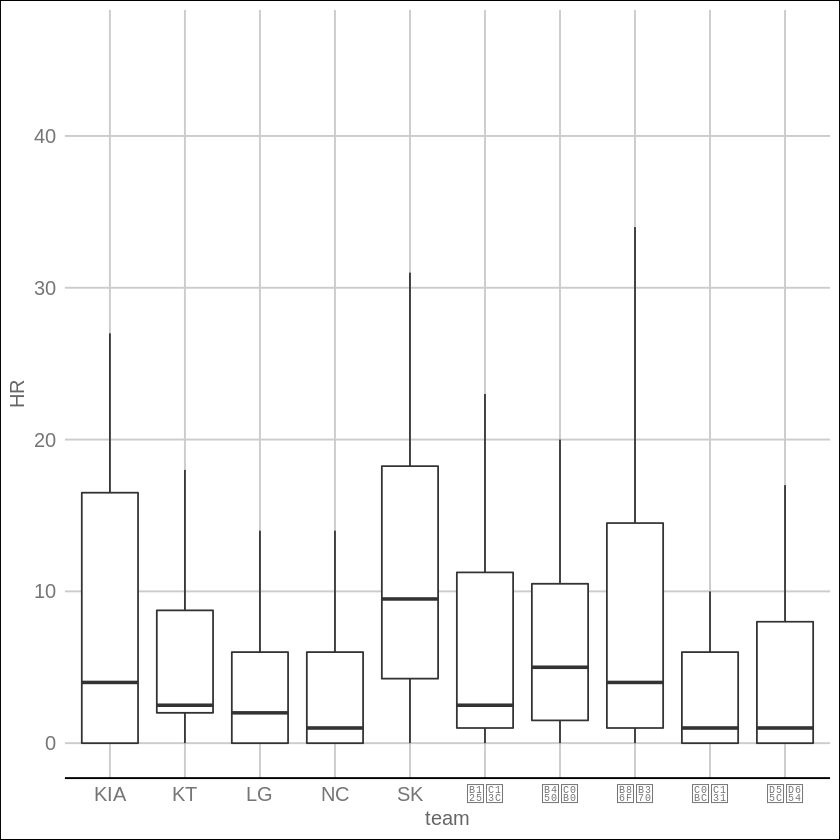

In [72]:
# outler 표기 삭제
g_box + geom_boxplot(outlier.shape = NA) +
 theme(axis.title.x = element_text(family = fonts()[1])) +  # 한글 설정. 
 theme_gdocs() # ggthemes

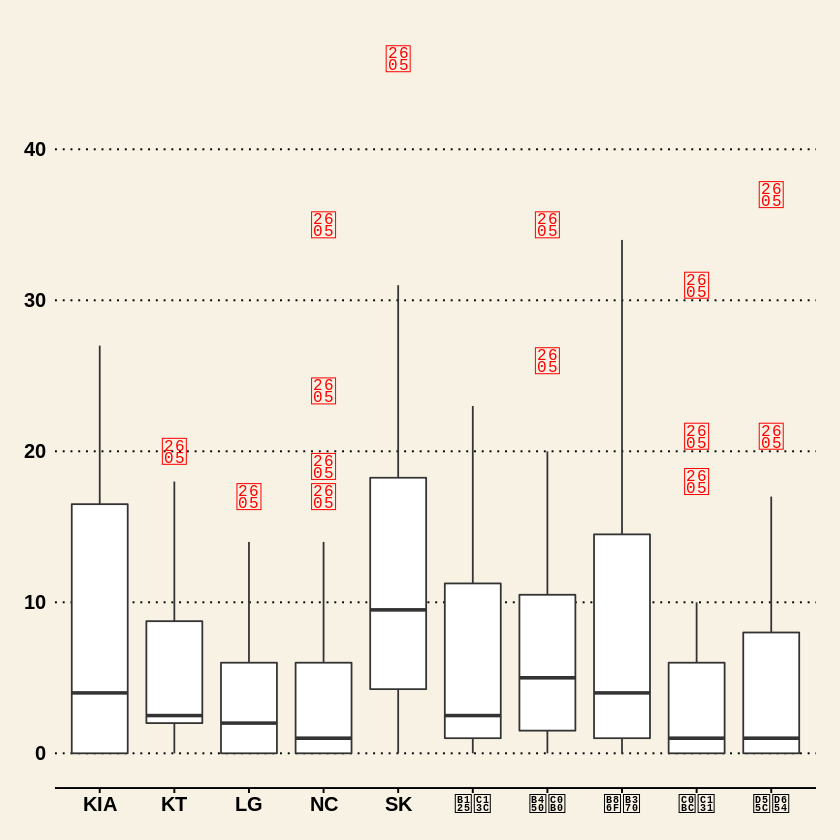

In [73]:
# 인자 변경을 통한 outlier 꾸미기 -> 별모양으로 outlier를 바꿔줌
g_box + geom_boxplot(outlier.color = "red", outlier.shape = "★", outlier.size = 7) +
 theme(axis.title.x = element_text(family = fonts()[1])) +  # 한글 설정. 
 theme_wsj() # ggthemes

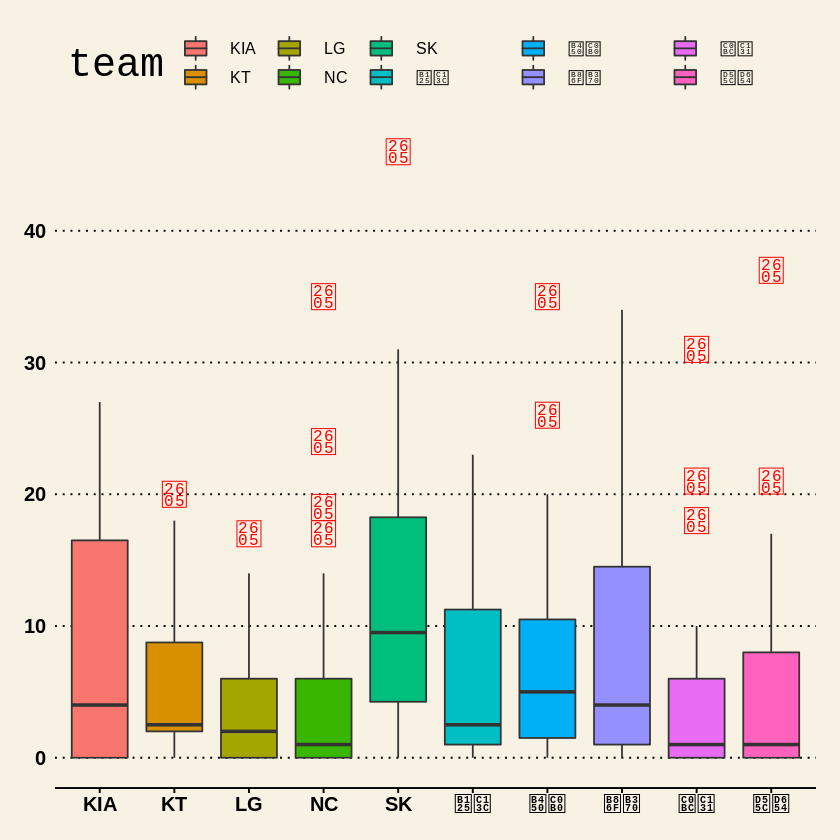

In [74]:
# fill 옵션 변경
g_box + geom_boxplot(mapping = aes(fill = team), outlier.color = "red", outlier.shape = "★", outlier.size = 7) +
 theme(axis.title.x = element_text(family = fonts()[1])) +  # 한글 설정. 
 theme_wsj() # ggthemes

In [75]:
# outlier에 라벨링
# is_outlier => 이상치를 판단해서 true 또는 false로 돌려줌
##outlier 값을 찾아주는 것 -> 1사분기보다 작거나, 3사분기보다 크면 outlier이다.

is_outlier <- function(x) { # x는 숫자형 벡터
  return(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x))
}

In [76]:
dat <- HR_2017 %>%
 group_by(team) %>% 
 mutate(is_outlier = ifelse(is_outlier(HR), batter_name, NA))

 dat %>% show()
 dat %>% filter(!is.na(is_outlier))

# A tibble: 216 x 6
# Groups:   team [10]
    year team  batter_name    HR   OPS is_outlier
   <int> <chr> <chr>       <int> <dbl> <chr>     
 1  2017 한화  강경학          0 0.552 NA        
 2  2017 NC    강구성          0 0     NA        
 3  2017 롯데  강민호         22 0.843 NA        
 4  2017 한화  강상원          0 0.5   NA        
 5  2017 LG    강승호          5 0.655 NA        
 6  2017 NC    강진성          1 0.925 NA        
 7  2017 삼성  강한울          0 0.684 NA        
 8  2017 한화  이종환          0 0     NA        
 9  2017 넥센  고종욱          8 0.811 NA        
10  2017 삼성  구자욱         21 0.91  구자욱    
# … with 206 more rows


year,team,batter_name,HR,OPS,is_outlier
<int>,<chr>,<chr>,<int>,<dbl>,<chr>
2017,삼성,구자욱,21,0.910000,구자욱
2017,NC,권희동,19,0.829000,권희동
2017,두산,김재환,35,1.032000,김재환
2017,NC,나성범,24,0.999000,나성범
2017,삼성,러프,31,0.965000,러프
2017,한화,로사리오,37,1.078496,로사리오
2017,NC,모창민,17,0.846000,모창민
2017,NC,스크럭스,35,0.997000,스크럭스
2017,두산,오재일,26,0.939000,오재일


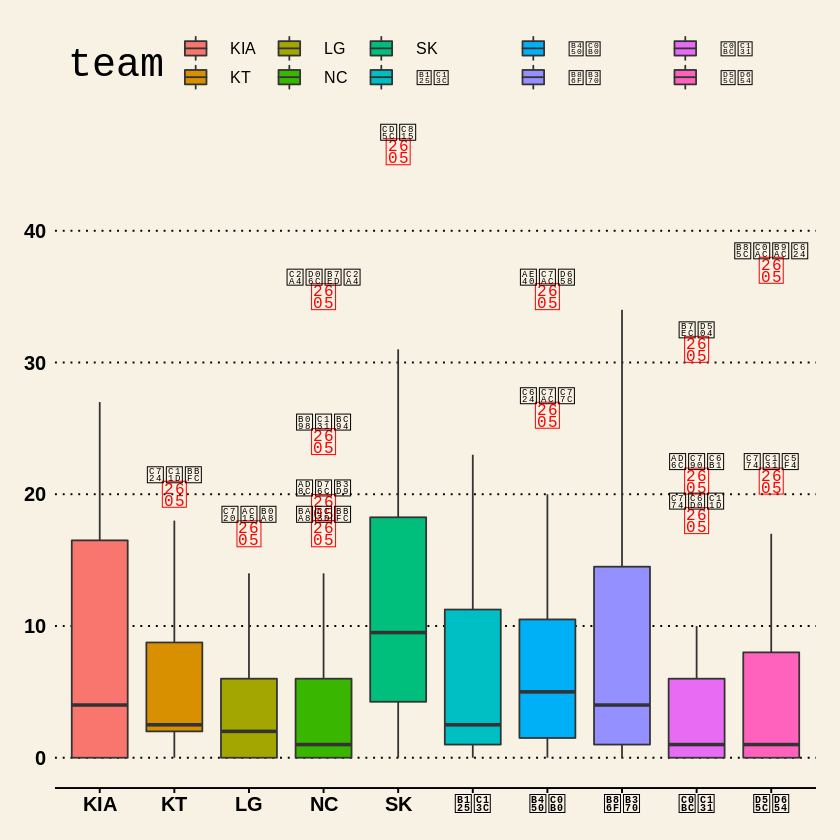

In [77]:
#geom_text로 이상치인 사람들만 라벨링 해준다.->na 값이 있는(이상치가 아닌 값) 이름은 전달하지 않는다. 

ggplot(data = dat, mapping = aes(x = team, y = HR)) + 
 geom_boxplot(mapping = aes(fill = team), outlier.color = "red", outlier.shape = "★", outlier.size = 7) +
 geom_text(mapping = aes(label = is_outlier), na.rm = T, vjust = -1) +
 theme(axis.title.x = element_text(family = fonts()[1])) +  # 한글 설정. 
 theme_wsj()


## **3. 평균, 분산, 표준편차**

* apply 

* base::summary()

* pastecs::stat.desc()

* psych::describe()
- - -

In [34]:
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% 
 as_tibble()

In [35]:
 DF%>%show()

# A tibble: 2,454 x 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# … with 2,444 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [36]:
# apply를 이용한 방법, error 발생, apply는 반드시 array
# apply는 array값만 사용가능하기 때문에 DF로 구할 수없다.

apply(DF, 2, mean, na.rm = T)

Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”


batter_id     batter_name            year            team             avg 
             NA              NA              NA              NA              NA 
              G              AB               R               H              2B 
             NA              NA              NA              NA              NA 
             3B              HR              TB             RBI              SB 
             NA              NA              NA              NA              NA 
             CS              BB             HBP              SO             GDP 
             NA              NA              NA              NA              NA 
            SLG             OBP               E   height/weight       year_born 
             NA              NA              NA              NA              NA 
       position          career starting_salary             OPS 
             NA              NA              NA              NA

In [78]:
# lapply를 이용한 방법
# 문자형은 평균이 구해지지 않는다. 

lapply(X = DF, FUN = function(col){
   mean(col, na.rm = T)
}) %>% unlist() %>% print()

Warning message in mean.default(col, na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, na.rm = T):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, na.rm = T):
“argument is not numeric or logical: returning NA”


      batter_id     batter_name            year            team             avg 
    178.0794621              NA    2011.6145069              NA       0.2375593 
              G              AB               R               H              2B 
     72.5350448     201.5146699      29.9123879      55.9881826       9.8634882 
             3B              HR              TB             RBI              SB 
      0.9576202       5.5040750      84.2791361      27.7885086       5.2901385 
             CS              BB             HBP              SO             GDP 
      2.3357783      20.9437653       3.4246129      38.5969845       4.6035045 
            SLG             OBP               E   height/weight       year_born 
      0.3438262       0.3066836       3.6764466              NA              NA 
       position          career starting_salary             OPS 
             NA              NA              NA       0.6499387 


* summary

In [38]:
# base::summary() : min, 1Q, median, mean, 3Q, max
# summary를 이용하면 평균,최대,최소,1사분기,3사분기 값 한번에 알 수 있다.

summary(DF)

   batter_id     batter_name             year          team          
 Min.   :  0.0   Length:2454        Min.   :1993   Length:2454       
 1st Qu.:101.2   Class :character   1st Qu.:2008   Class :character  
 Median :183.0   Mode  :character   Median :2013   Mode  :character  
 Mean   :178.1                      Mean   :2012                     
 3rd Qu.:265.0                      3rd Qu.:2016                     
 Max.   :344.0                      Max.   :2018                     
                                                                     
      avg               G                AB               R         
 Min.   :0.0000   Min.   :  1.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.:0.2030   1st Qu.: 28.00   1st Qu.: 38.25   1st Qu.:  5.00  
 Median :0.2550   Median : 79.00   Median :163.00   Median : 21.00  
 Mean   :0.2376   Mean   : 72.54   Mean   :201.51   Mean   : 29.91  
 3rd Qu.:0.2910   3rd Qu.:115.00   3rd Qu.:357.50   3rd Qu.: 49.00  
 Max.   :1.0000   Max.   :

* pastecs

```
basic = TRUE : 관측치 개수, null 개수, NA 개수, 최소값, 최대값, 범위, 합
desc = TRUE : 중앙값, 평균, 분산, 표준편차, 변이계수
norm = TRUE : 왜도, 첨도, 정규성 검정통계량, 정규성 검정 P-value
p = 0.90 :  신뢰계수 90% (유의수준 10%) 값 => 90% 신뢰구간은 평균 ± CI.mean.0.9 값
(위의 예 Price의 90% 신뢰구간은 19.51 ± 1.66)
```

In [39]:
install.packages("pastecs")
library(pastecs)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pastecs’


The following objects are masked from ‘package:data.table’:

    first, last


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is masked from ‘package:tidyr’:

    extract




In [40]:
# summary와 비슷한 기능을 하지만, 더 많은 값들을 돌려준다. 

stat.desc(DF)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,⋯,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
nbr.val,2.454000e+03,NA,2.454000e+03,NA,2.428000e+03,2.454000e+03,2.454000e+03,2.454000e+03,2.454000e+03,2.454000e+03,⋯,2.454000e+03,2.428000e+03,2.430000e+03,2.454000e+03,NA,NA,NA,NA,NA,2.428000e+03
nbr.null,1.000000e+00,NA,0.000000e+00,NA,1.650000e+02,0.000000e+00,2.600000e+01,2.320000e+02,1.910000e+02,4.930000e+02,⋯,5.770000e+02,1.720000e+02,1.280000e+02,7.020000e+02,NA,NA,NA,NA,NA,1.280000e+02
nbr.na,0.000000e+00,NA,0.000000e+00,NA,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,2.600000e+01,2.400000e+01,0.000000e+00,NA,NA,NA,NA,NA,2.600000e+01
min,0.000000e+00,NA,1.993000e+03,NA,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NA,NA,NA,NA,NA,0.000000e+00
max,3.440000e+02,NA,2.018000e+03,NA,1.000000e+00,1.440000e+02,6.000000e+02,1.350000e+02,2.010000e+02,4.700000e+01,⋯,2.400000e+01,3.000000e+00,1.000000e+00,3.000000e+01,NA,NA,NA,NA,NA,4.000000e+00
range,3.440000e+02,NA,2.500000e+01,NA,1.000000e+00,1.430000e+02,6.000000e+02,1.350000e+02,2.010000e+02,4.700000e+01,⋯,2.400000e+01,3.000000e+00,1.000000e+00,3.000000e+01,NA,NA,NA,NA,NA,4.000000e+00
sum,4.370070e+05,NA,4.936502e+06,NA,5.767940e+02,1.780010e+05,4.945170e+05,7.340500e+04,1.373950e+05,2.420500e+04,⋯,1.129700e+04,8.348100e+02,7.452412e+02,9.022000e+03,NA,NA,NA,NA,NA,1.578051e+03
median,1.830000e+02,NA,2.013000e+03,NA,2.550000e-01,7.900000e+01,1.630000e+02,2.100000e+01,4.000000e+01,7.000000e+00,⋯,3.000000e+00,3.601242e-01,3.285917e-01,2.000000e+00,NA,NA,NA,NA,NA,6.886375e-01
mean,1.780795e+02,NA,2.011615e+03,NA,2.375593e-01,7.253504e+01,2.015147e+02,2.991239e+01,5.598818e+01,9.863488e+00,⋯,4.603504e+00,3.438262e-01,3.066836e-01,3.676447e+00,NA,NA,NA,NA,NA,6.499387e-01


In [79]:
# 숫자형 열에대해서만 계산을 진행한다. 

DF %>% select_if(is.numeric) %>% stat.desc(.) %>% round(., 2)

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,⋯,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,2454.00,2454.00,2428.00,2454.00,2454.00,2454.00,2454.00,2454.00,2454.00,2454.00,⋯,2454.00,2454.00,2454.00,2454.00,2454.00,2454.00,2428.00,2430.00,2454.00,2428.00
nbr.null,1.00,0.00,165.00,0.00,26.00,232.00,191.00,493.00,1440.00,844.00,⋯,867.00,977.00,344.00,762.00,94.00,577.00,172.00,128.00,702.00,128.00
nbr.na,0.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,26.00,24.00,0.00,26.00
min,0.00,1993.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,344.00,2018.00,1.00,144.00,600.00,135.00,201.00,47.00,17.00,53.00,⋯,84.00,21.00,108.00,27.00,161.00,24.00,3.00,1.00,30.00,4.00
range,344.00,25.00,1.00,143.00,600.00,135.00,201.00,47.00,17.00,53.00,⋯,84.00,21.00,108.00,27.00,161.00,24.00,3.00,1.00,30.00,4.00
sum,437007.00,4936502.00,576.79,178001.00,494517.00,73405.00,137395.00,24205.00,2350.00,13507.00,⋯,12982.00,5732.00,51396.00,8404.00,94717.00,11297.00,834.81,745.24,9022.00,1578.05
median,183.00,2013.00,0.26,79.00,163.00,21.00,40.00,7.00,0.00,2.00,⋯,2.00,1.00,14.00,2.00,33.00,3.00,0.36,0.33,2.00,0.69
mean,178.08,2011.61,0.24,72.54,201.51,29.91,55.99,9.86,0.96,5.50,⋯,5.29,2.34,20.94,3.42,38.60,4.60,0.34,0.31,3.68,0.65


* psych

```
관측값 개수(n), 평균(mean), 표준편차(sd), 중앙값(median), 
절삭평균(10% 절삭평균), 중위값절대편차(from 중위값) (MAD, median absolute deviation), 
최소값(min), 최대값(max), 범위(range), 왜도(skew), 첨도(kurtosis), 표준오차(SE, standard error)
```

In [42]:
install.packages("psych")
library("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [43]:
describe(DF)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
batter_id,1,2454,178.0794621,97.55794687,183.0000000,179.5931772,121.57320000,0,344,344,-0.10929483,-1.153959349,1.969361179
batter_name*,2,2454,179.0794621,97.55794687,184.0000000,180.5931772,121.57320000,1,345,344,-0.10929483,-1.153959349,1.969361179
year,3,2454,2011.6145069,4.99283317,2013.0000000,2012.0814664,4.44780000,1993,2018,25,-0.75718611,-0.049718473,0.100788220
team*,4,2454,7.2045640,3.93606201,8.0000000,7.1685336,2.96520000,1,16,15,0.06680285,-0.897948852,0.079455626
avg,5,2428,0.2375593,0.09844015,0.2550000,0.2466466,0.06078660,0,1,1,0.53683516,10.569153474,0.001997781
G,6,2454,72.5350448,45.09387087,79.0000000,73.4643585,60.78660000,1,144,143,-0.18103926,-1.408277141,0.910290976
AB,7,2454,201.5146699,169.53702932,163.0000000,190.0595723,212.01180000,0,600,600,0.39941423,-1.242563850,3.422372597
R,8,2454,29.9123879,28.77875855,21.0000000,26.2479633,28.16940000,0,135,135,0.91132165,-0.030787736,0.580944677
H,9,2454,55.9881826,52.25384378,40.0000000,50.6059063,54.85620000,0,201,201,0.64343499,-0.835118941,1.054826334


## **4. 산점도(Scatter plot), 공분산(Covariance), 상관계수(Correlation Coefficient)**

- - -

#### **A. 산점도(Scatter plot)**

산점도는 두 개 변수 간의 관계를 나타내는 방법. 상관계수를 파악하지 전에 두 변수 간 관련성을 시각적으로 파악할 수 있음.

![png](https://camo.githubusercontent.com/47464af03eda69bcf450e701b7e4dd84af4d2538/68747470733a2f2f737465656d6974696d616765732e636f6d2f702f4333545a5231673831554e61507337767a4e5848756557355a4d3736445348574559376f6e6d664c78634b3269515837616b34353770534668783367527442724d6d4c477554535462725935706d6b44327a79337743377962315059464a387544466d785147505373796b467272317a516a4e593356593f666f726d61743d6d61746368266d6f64653d6669742677696474683d363430)



In [44]:
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

In [80]:
DF %>% show()

# A tibble: 2,454 x 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# … with 2,444 more rows, and 18 more variables: HR <int>, TB <int>, RBI

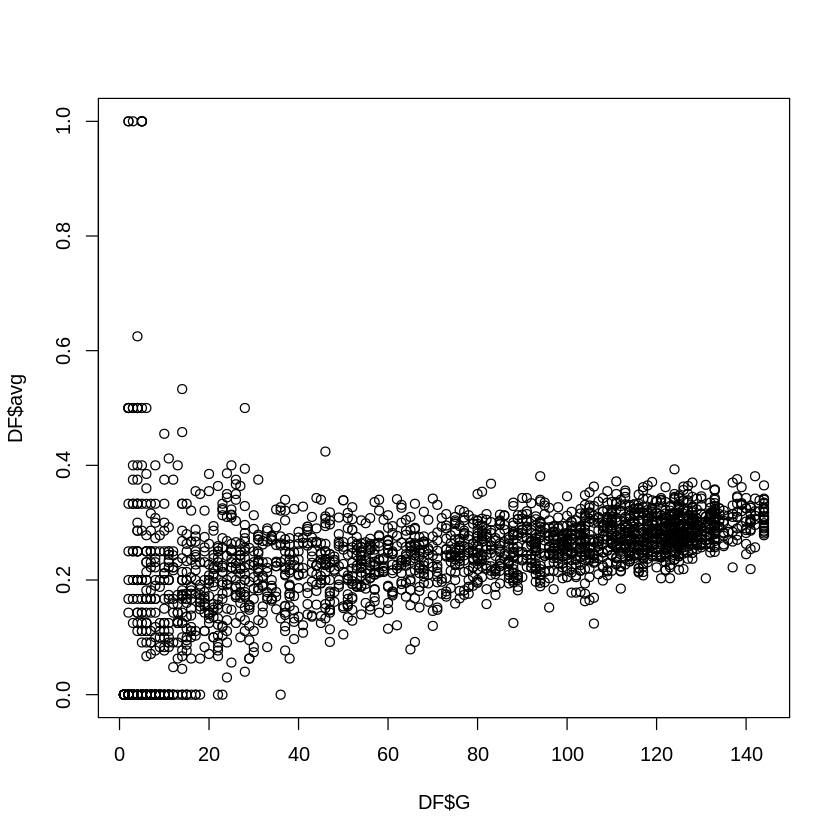

In [46]:
# https://dacon.io/competitions/official/235546/data/
# G = 경기수

plot(x = DF$G, y = DF$avg)

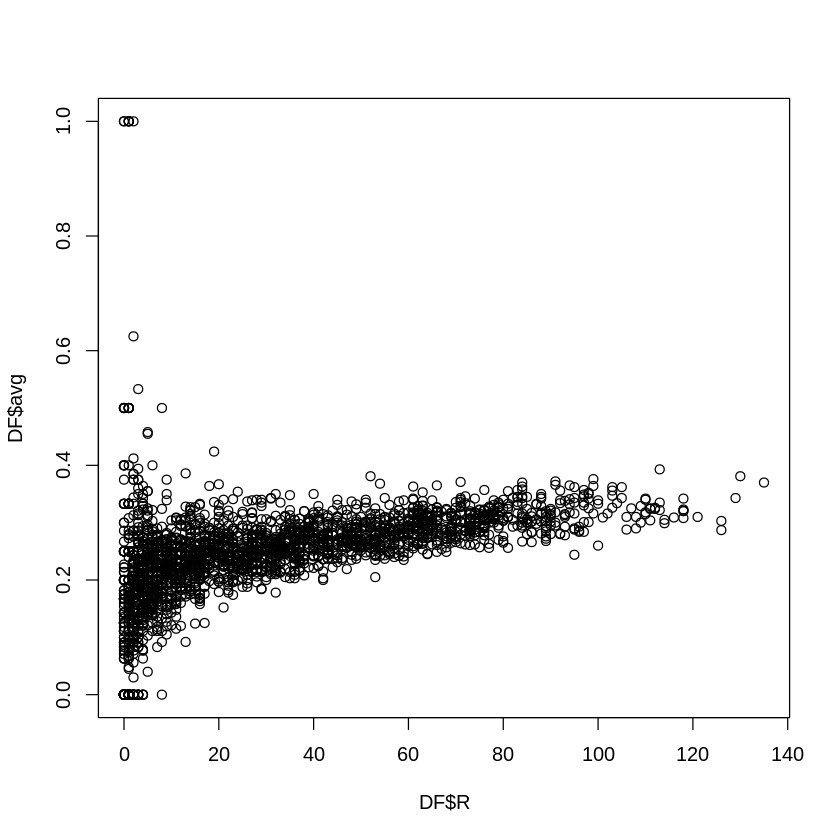

In [47]:
plot(DF$avg ~ DF$R )

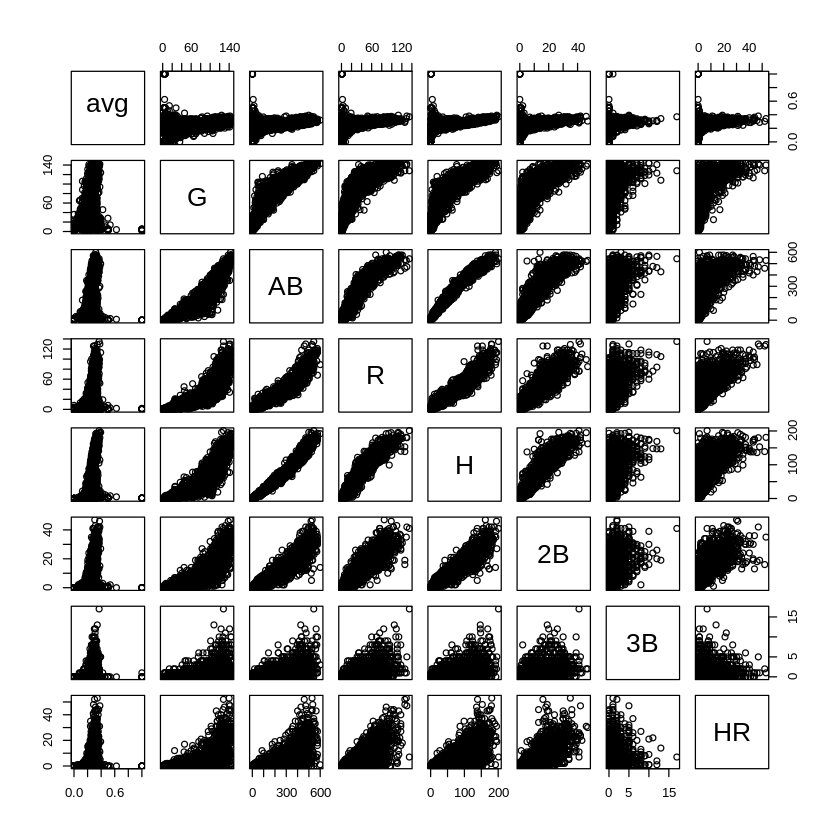

In [48]:
DF[, 5:12] %>% plot()

#### **B. 공분산(Covariance), 상관계수(Correlation Coefficient)**

- - -

산점도를 이용하면 두 변수간의 직선적인 관계를 개략적으로 파악할 수 있지만, 두 변수 사이의 관계를 보다 정확히 숫자로 나타낼 수 없다.

``공분산과 상관계수``를 활용하여 관계를 수치로 파악한다.

* **공분산**(``cov()`` 사용)

공분산은 2개의 확률변수의 상관정도를 나타내는 값인데, 만약 2개의 변수 중 ``하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하면 공분산의 값은 양수, 반대의 경우에는 음수``가 나온다.



In [49]:
# cov()
# na 값이 있다면 공분산이 되지 않는다. 

cov(DF$G, DF$avg)

[1] NA

In [50]:
# 결측값 처리, na.omit을 이용해 행 전체를 날릴 것인가... 아니면 NA를 0으로 바꿀 것인가!! 선택의 자유~

DF_NA <- DF %>% replace(is.na(.), 0) # tidyr replace 이용

In [51]:
cov(DF_NA$G, DF_NA$avg) # G(경기수), avg(타율)

[1] 2.295412

In [52]:
cov(DF_NA$avg, DF_NA$HR) # avg(타율), HR(홈런)

[1] 0.3025775

In [81]:
# 두 특징이 높은 연관성이 있다는 것을 알 수 있다.

cov(DF_NA$G, DF_NA$AB) # G(경기수), AB(타수)

[1] 7122.257

In [82]:
DF_NA[, 5:12] %>% cov()

,avg,G,AB,R,H,2B,3B,HR
avg,0.01017958,2.295412,8.630207,1.44330,2.791114,0.491188,0.04560962,0.3025775
G,2.29541229,2033.457190,7122.256518,1115.50266,2103.314519,371.111798,36.26198315,227.7151038
AB,8.63020729,7122.256518,28742.804310,4616.44544,8729.386435,1546.967556,149.05524895,986.2561571
R,1.44329968,1115.502664,4616.445436,828.21694,1445.567656,257.777680,27.11165444,176.8639935
H,2.79111424,2103.314519,8729.386435,1445.56766,2730.464190,484.529980,46.08551610,313.6757514
2B,0.49118801,371.111798,1546.967556,257.77768,484.529980,97.442833,7.61019273,58.8845761
3B,0.04560962,36.261983,149.055249,27.11165,46.085516,7.610193,2.71324603,2.6985013
HR,0.30257749,227.715104,986.256157,176.86399,313.675751,58.884576,2.69850134,63.8301913


* **상관계수**(``cor()`` 사용)

공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수 있으나, 2개 변수의 측정 단위의 따라 값이 달라지므로 절대적 정도를 파악하는데 한계가 존재.

이때 상관계수를 활용하면, 절대적 정도를 파악할 수 있다.!!!
```
 ex) 2B와 G -> 371.111798
     2B와 R -> 257.777680 
     ...??
```

![png](https://camo.githubusercontent.com/47464af03eda69bcf450e701b7e4dd84af4d2538/68747470733a2f2f737465656d6974696d616765732e636f6d2f702f4333545a5231673831554e61507337767a4e5848756557355a4d3736445348574559376f6e6d664c78634b3269515837616b34353770534668783367527442724d6d4c477554535462725935706d6b44327a79337743377962315059464a387544466d785147505373796b467272317a516a4e593356593f666f726d61743d6d61746368266d6f64653d6669742677696474683d363430)


In [55]:
avg_HR_cor_M <- DF_NA[, 5:12] %>% cor()
avg_HR_cor_M

,avg,G,AB,R,H,2B,3B,HR
avg,1.0000000,0.5045199,0.5045356,0.4970723,0.5294129,0.4931828,0.2744398,0.3753692
G,0.5045199,1.0000000,0.9316130,0.8595696,0.8926238,0.8337048,0.4881906,0.6320643
AB,0.5045356,0.9316130,1.0000000,0.9461742,0.9853736,0.9243612,0.5337503,0.7281353
R,0.4970723,0.8595696,0.9461742,1.0000000,0.9612761,0.9073990,0.5719254,0.7692266
H,0.5294129,0.8926238,0.9853736,0.9612761,1.0000000,0.9393500,0.5354287,0.7513627
2B,0.4931828,0.8337048,0.9243612,0.9073990,0.9393500,1.0000000,0.4680326,0.7466439
3B,0.2744398,0.4881906,0.5337503,0.5719254,0.5354287,0.4680326,1.0000000,0.2050525
HR,0.3753692,0.6320643,0.7281353,0.7692266,0.7513627,0.7466439,0.2050525,1.0000000


In [83]:
# 상관계수 plotting 패키지 (https://rpubs.com/cardiomoon/27080)
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
?corrplot

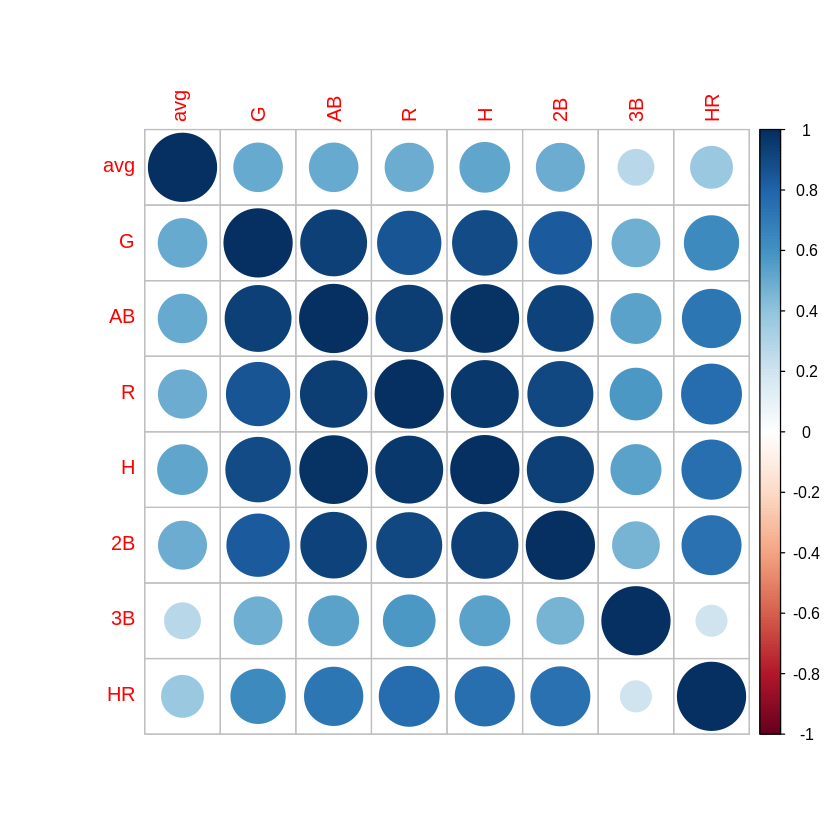

In [84]:
# 연관성이 높을수록 1에 가까운 색을 가진다.
# 상관계수를 구하는 패키지를 사용한다.

corrplot(avg_HR_cor_M)

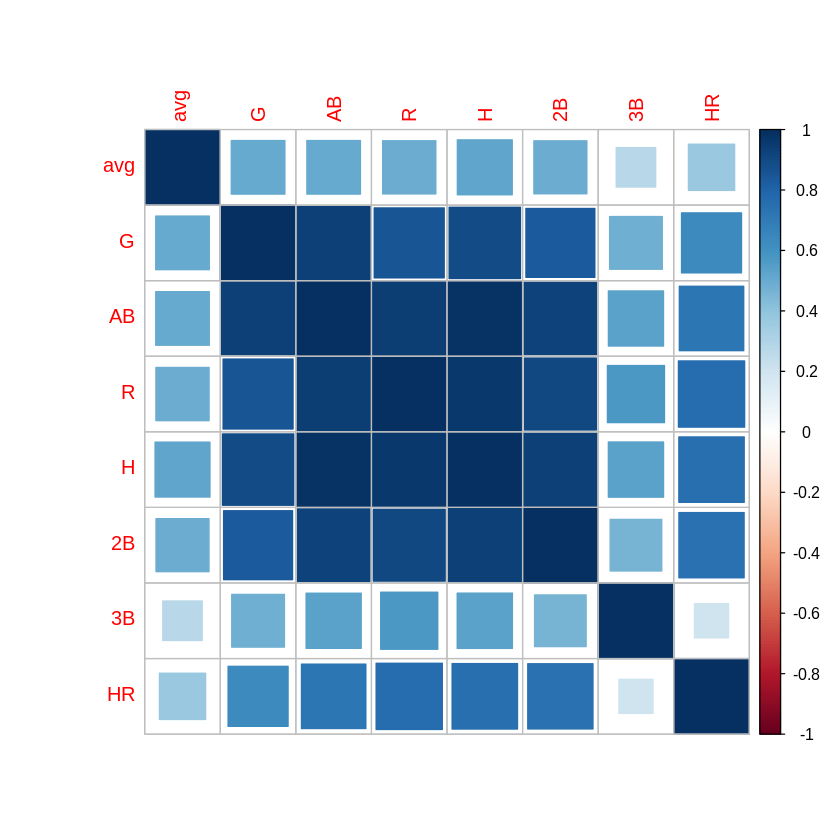

In [85]:
# method 변경
# method = square
# 모양을 변경
corrplot(avg_HR_cor_M, method="square")

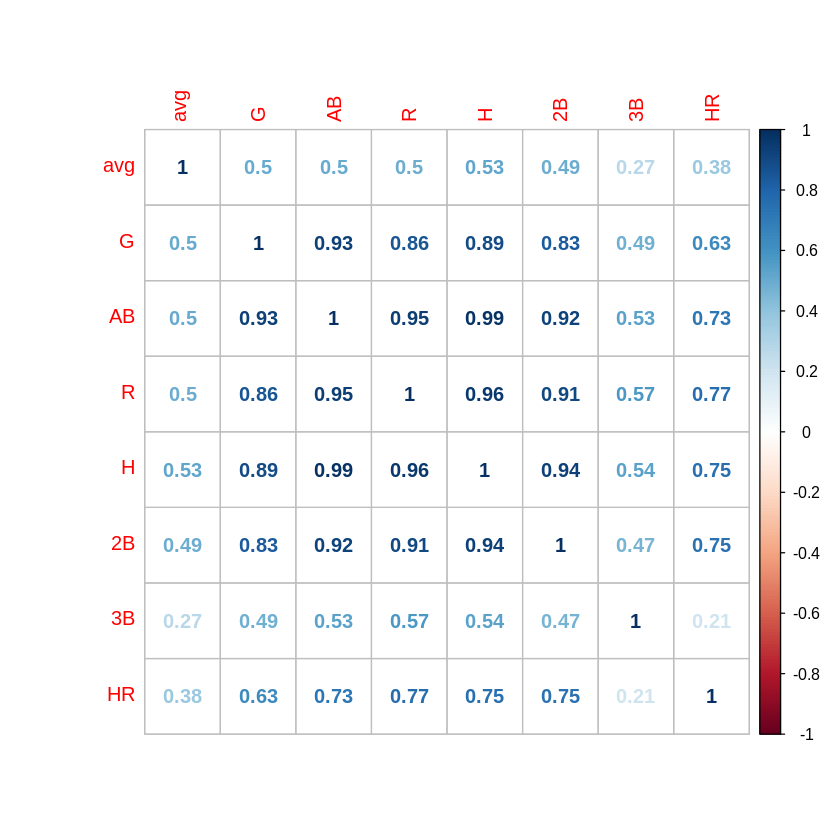

In [60]:
# method 변경
# method = number
corrplot(avg_HR_cor_M, method="number")

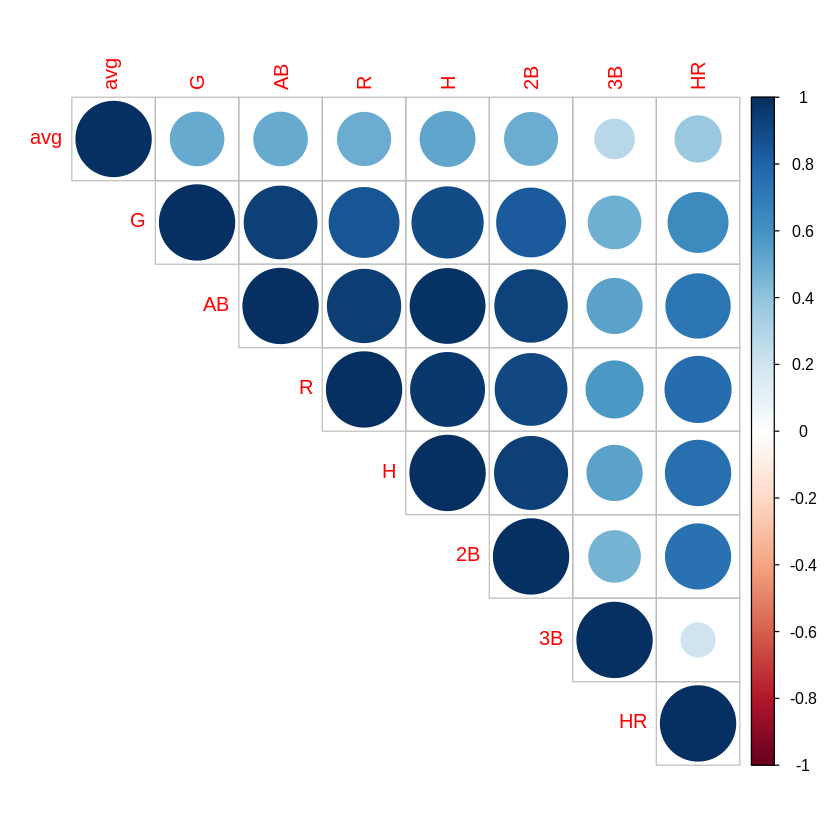

In [86]:
# type 변경
# type = upper
# 대각선을 기준으로 한쪽만 봐도 되기 때문에 upper 해도 똑같음

corrplot(avg_HR_cor_M,type="upper")

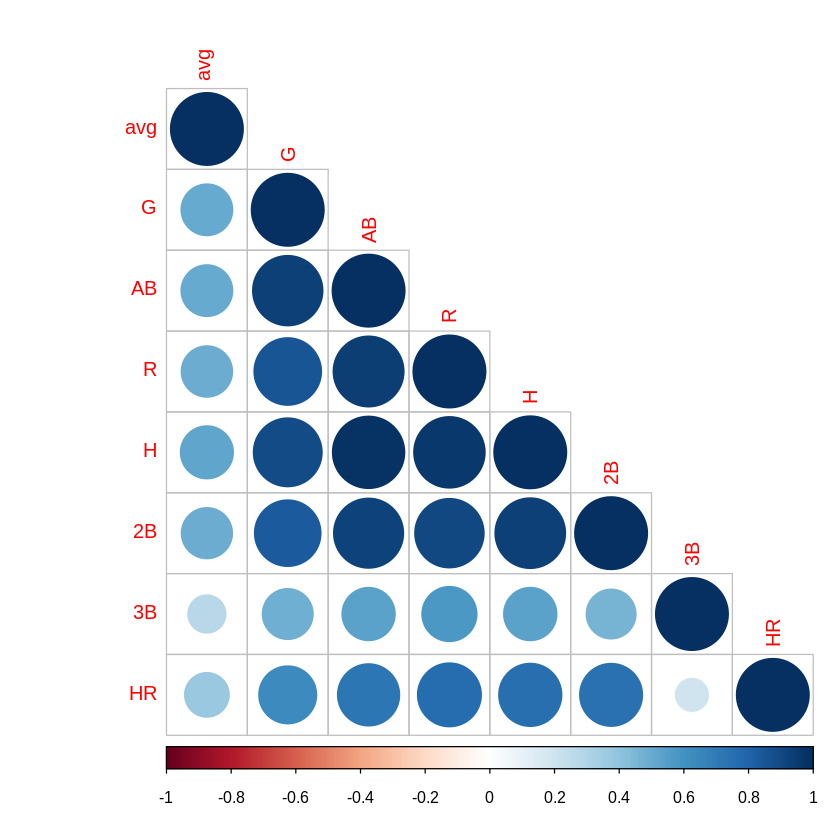

In [62]:
# type 변경
# type = lower
corrplot(avg_HR_cor_M,type="lower")

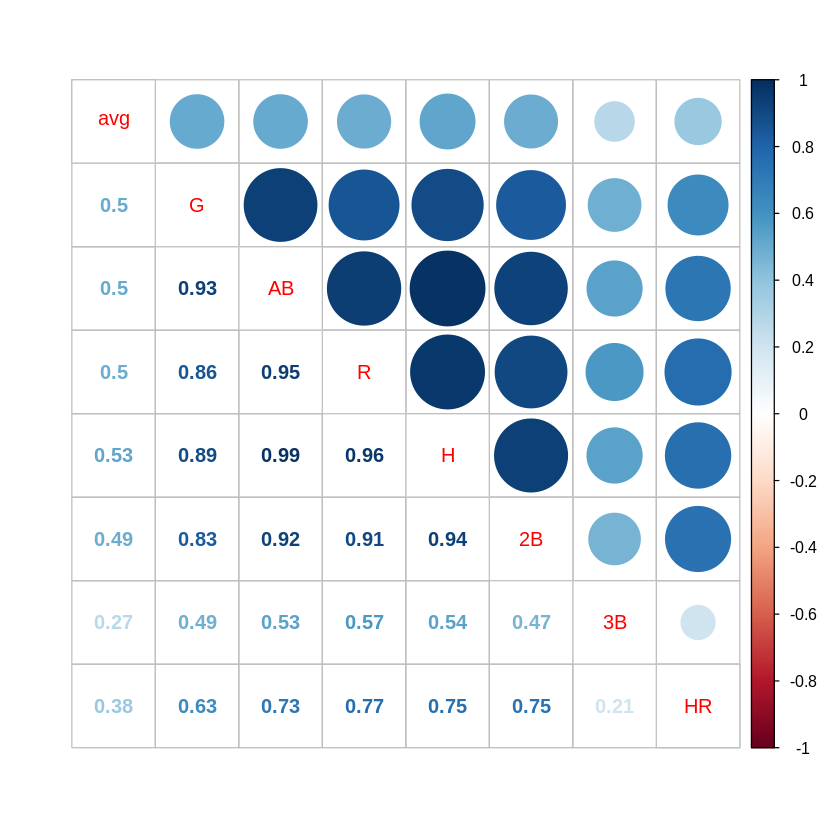

In [87]:
# corrplot.mixed
corrplot.mixed(avg_HR_cor_M)